In [1]:
import numpy as np
from config import app, db, experiment
from models import *
participants = [p for p in Participant.select().dicts()] # get all participants
trials = [p for p in Trial.select().dicts()] # get all trials

In [2]:
Trial.select().where(Trial.index==1)[:]

[<Trial 1> participant=1, truth=é, assist=1.0, answer1=é, answer2=è, listen_count=3, listens=? ? ?
  file=/static/data/P5_D4_RT_003_cam_short/%C3%A9_003_sync_1_assist_1.short.wav,
 <Trial 1> participant=2, truth=é, assist=1.0, answer1=i, answer2=è, listen_count=4, listens=? ? i ? ?
  file=/static/data/P5_D4_RT_003_cam_short/%C3%A9_003_sync_1_assist_1.short.wav,
 <Trial 1> participant=3, truth=é, assist=1.0, answer1=u, answer2=é, listen_count=3, listens=? ? ?
  file=/static/data/P5_D4_RT_003_cam_short/%C3%A9_003_sync_1_assist_1.short.wav,
 <Trial 1> participant=4, truth=é, assist=1.0, answer1=i, answer2=é, listen_count=4, listens=? ? ? ?
  file=/static/data/P5_D4_RT_003_cam_short/%C3%A9_003_sync_1_assist_1.short.wav,
 <Trial 1> participant=5, truth=é, assist=1.0, answer1=é, answer2=e, listen_count=14, listens=? ? ? ? ? ? ? ? ? ? ? ? ? e ?
  file=/static/data/P5_D4_RT_003_cam_short/%C3%A9_003_sync_1_assist_1.short.wav,
 <Trial 1> participant=6, truth=é, assist=1.0, answer1=é, answer2=i, 

In [3]:
for p in participants:
    print(p)

{'id': 1, 'gender': 'female', 'age': 27, 'native': True, 'consent': True, 'name': 'Marie', 'date_created': datetime.datetime(2024, 2, 8, 10, 49, 36, 684878), 'completed': True, 'trial_permutation': [7, 5, 23, 18, 3, 14, 24, 30, 19, 15, 11, 27, 13, 9, 4, 17, 28, 16, 8, 6, 29, 22, 26, 21, 0, 1, 25, 2, 20, 10, 12]}
{'id': 2, 'gender': 'male', 'age': 25, 'native': True, 'consent': True, 'name': 'The Floof', 'date_created': datetime.datetime(2024, 2, 8, 15, 7, 9, 377495), 'completed': True, 'trial_permutation': [11, 16, 27, 2, 17, 5, 30, 18, 14, 21, 0, 6, 7, 9, 23, 29, 1, 24, 20, 13, 26, 8, 19, 4, 22, 3, 28, 15, 25, 12, 10]}
{'id': 3, 'gender': 'male', 'age': 31, 'native': True, 'consent': True, 'name': 'L.D.', 'date_created': datetime.datetime(2024, 2, 8, 15, 8, 59, 193783), 'completed': True, 'trial_permutation': [28, 14, 11, 15, 27, 10, 23, 26, 24, 16, 4, 21, 7, 8, 12, 2, 25, 19, 9, 17, 5, 1, 13, 20, 6, 22, 30, 3, 29, 0, 18]}
{'id': 4, 'gender': 'male', 'age': 31, 'native': True, 'consen

In [4]:
# participants names
print('\n'.join( f"{p['id']}: {p['name']}" for p in participants))

1: Marie
2: The Floof
3: L.D.
4: Arythtmique2ouf
5: martichou
6: Kinou
7: Epi
8: Clem
9: Florian
10: Bobus
11: 


In [5]:
# vowel reference: https://fr.wikipedia.org/wiki/Formant
# by vowels were analyzed manually with Praat

from collections import namedtuple
Vowel = namedtuple('Vowel', 'F1 F2 nasal F1_by F2_by')
a = Vowel(750, 1450, False, 700, 1250) # by formants are hard to read
i = Vowel(250, 2250, False, 280, 2040)
ou = Vowel(300, 750, False, 290, 780)
u = Vowel(250, 1750, False, 300, 1700)
é = Vowel(400, 2050, False, 330, 1950)
è = Vowel(600, 1750, False, 500, 1850)
e = Vowel(350, 1350, False, 330, 1380) # eu from 'feu'
o = Vowel(350, 750, False, 350, 650)
an = Vowel(750, 1250, True, 600, 880) # by formants are hard to read
on = Vowel(500, 1250, True, 370, 1380)
ain = Vowel(700, 1500, True, 730, 1260)

vowels = {'a': a, 'i': i, 'ou': ou, 'u': u, 'é': é, 'è': è, 'e': e, 'o': o, 'an': an, 'on': on, 'in': ain}
by_vowels = {v: Vowel(vowels[v].F1_by, vowels[v].F2_by, vowels[v].nasal, 0, 0) for v in vowels}

In [6]:
[t for t in Trial.select().where(Trial.participant==1).order_by(Trial.index)]

[<Trial 0> participant=1, truth=a, assist=0.8, answer1=a, answer2=a, listen_count=6, listens=? ? ? ? ? ?
  file=/static/data/P5_D4_RT_003_cam_short/a_003_sync_1_assist_08.short.wav,
 <Trial 1> participant=1, truth=é, assist=1.0, answer1=é, answer2=è, listen_count=3, listens=? ? ?
  file=/static/data/P5_D4_RT_003_cam_short/%C3%A9_003_sync_1_assist_1.short.wav,
 <Trial 2> participant=1, truth=i, assist=0.5, answer1=i, answer2=i, listen_count=4, listens=? ? ? ?
  file=/static/data/P5_D4_RT_003_cam_short/i_003_sync_1_assist_05.short.wav,
 <Trial 3> participant=1, truth=o, assist=0.2, answer1=ou, answer2=o, listen_count=11, listens=? ? ? ? ? ? ? ? ? ? ?
  file=/static/data/P5_D4_RT_003_cam_short/o_003_sync_2_assist_02.short.wav,
 <Trial 4> participant=1, truth=ou, assist=0.2, answer1=a, answer2=o, listen_count=15, listens=? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
  file=/static/data/P5_D4_RT_003_cam_short/ou_003_sync_3_assist_02.short.wav,
 <Trial 5> participant=1, truth=a, assist=0.3, answer1=o, answe

In [7]:
trial_formants = {0: Vowel(640, 1150, False, 0, 0), # F1 is unstable
                  1: Vowel(350, 1850, False, 0, 0),
                  2: Vowel(290, 0, False, 0, 0), # F2 impossible to read?
                  3: Vowel(400, 1050, False, 0, 0),
                  4: Vowel(450, 750, False, 0, 0), # F2 hard to read
                  5: Vowel(480, 1200, False, 0, 0),
}

In [8]:
# Helpers

truth = [t['truth'] for t in trials]
pred = [t['answer1'] for t in trials]
pred2 = [t['answer2'] for t in trials]
assist = [t['assist'] for t in trials]


Text(0.5, 1.0, 'Truth if truth in closest or second closest else closest')

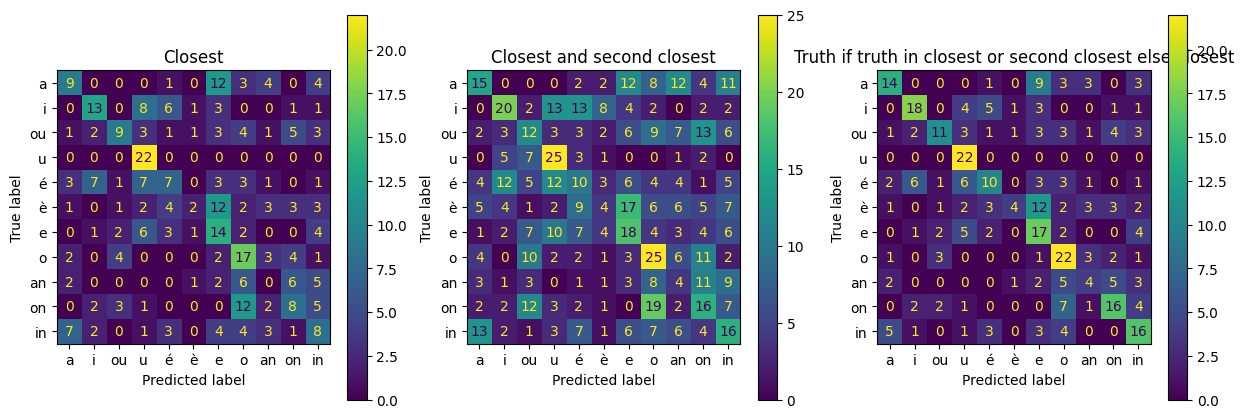

In [9]:
# Confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, axs = plt.subplots(1, 3, figsize=(15,5))

labels = [v for v in vowels]
confusion = confusion_matrix(truth, pred, labels=labels)
ConfusionMatrixDisplay.from_predictions(truth, pred, ax=axs[0], labels=labels)
axs[0].set_title('Closest')


ConfusionMatrixDisplay.from_predictions(truth + truth, pred + pred2, ax=axs[1], labels=labels)
axs[1].set_title('Closest and second closest')

closest_or_second = []
for t, p1, p2 in zip(truth, pred, pred2):
    closest_or_second.append(t if t in (p1, p2) else p1)
        
ConfusionMatrixDisplay.from_predictions(truth, closest_or_second, ax=axs[2], labels=labels)
axs[2].set_title('Truth if truth in closest or second closest else closest')

In [10]:
print(closest_or_second[:10])

print([x for x in zip(truth,pred,pred2)][:10])

['e', 'o', 'é', 'o', 'o', 'u', 'a', 'ou', 'an', 'a']
[('i', 'e', 'o'), ('a', 'o', 'on'), ('è', 'é', 'e'), ('on', 'o', 'ou'), ('o', 'ou', 'o'), ('u', 'u', 'u'), ('é', 'a', 'an'), ('ou', 'ou', 'on'), ('an', 'in', 'an'), ('an', 'a', 'o')]


Text(0, 0.5, 'Accuracy')

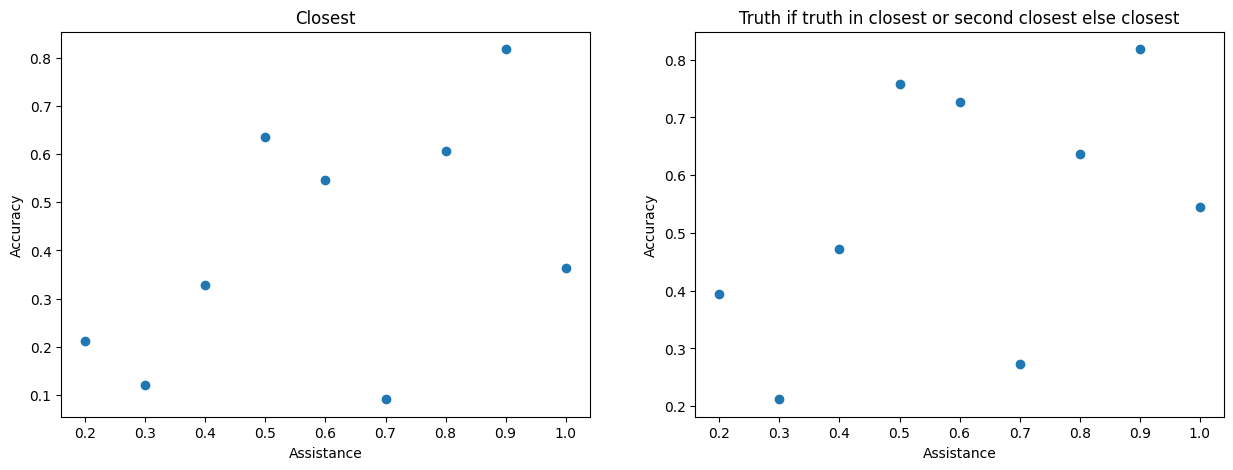

In [11]:
# Effect of assistance on the percentage of correct predictions

assist_values = sorted(list(set(assist)))
bins_closest = []
bins_closest_or_second = []
for assistance in assist_values:
    trials_assist = [t for t in trials if t['assist'] == assistance]
    
    correct_closest = sum([t['truth'] == t['answer1'] for t in trials_assist])
    correct_closest_or_second = sum([   (t['truth'] == t['answer1'])
                                     or (t['truth'] == t['answer2'])
                                     for t in trials_assist])
    
    bins_closest.append( correct_closest/len(trials_assist) )
    bins_closest_or_second.append( correct_closest_or_second/len(trials_assist) )

fig, axs = plt.subplots(1, 2, figsize=(15,5))

axs[0].scatter(assist_values, bins_closest)
axs[0].set_title('Closest')
axs[0].set_xlabel('Assistance')
axs[0].set_ylabel('Accuracy')

axs[1].scatter(assist_values, bins_closest_or_second)
axs[1].set_title('Truth if truth in closest or second closest else closest')
axs[1].set_xlabel('Assistance')
axs[1].set_ylabel('Accuracy')  

[[ 0. 22.  0.  0.  0.  0. 11.  0.  0.]
 [ 0.  0. 22. 11.  0.  0.  0.  0.  0.]
 [11. 11.  0. 11.  0.  0.  0.  0.  0.]
 [ 0.  0. 11.  0.  0.  0. 11.  0.  0.]
 [11.  0. 11.  0.  0.  0.  0.  0. 11.]
 [11. 11.  0.  0.  0. 11.  0.  0.  0.]
 [11.  0.  0.  0. 11.  0. 11.  0.  0.]
 [22.  0.  0.  0.  0.  0.  0. 11.  0.]
 [ 0. 11.  0.  0.  0. 11.  0.  0.  0.]
 [11.  0. 11. 11.  0.  0.  0.  0.  0.]
 [22. 11.  0.  0.  0.  0.  0.  0.  0.]]


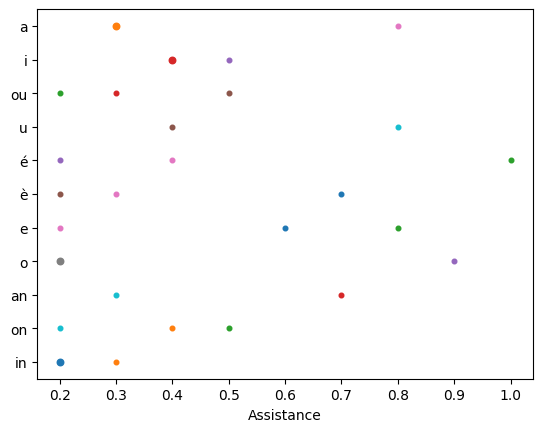

In [12]:
# number of vowels per assist value

assist_values = sorted(list(set(assist)))
ax = plt.axes()

m = np.zeros((len(assist_values), len(vowels)))

for i, assistance in enumerate(assist_values):
    for j, v in enumerate(vowels):
        m[i][j] = Trial.select().where( (Trial.assist==assistance) & (Trial.truth==v) ).count()
        ax.scatter(assistance, len(vowels)-j -1, s=m[i][j])

ax.set_xlabel('Assistance')
ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels[::-1])
print(m.transpose())


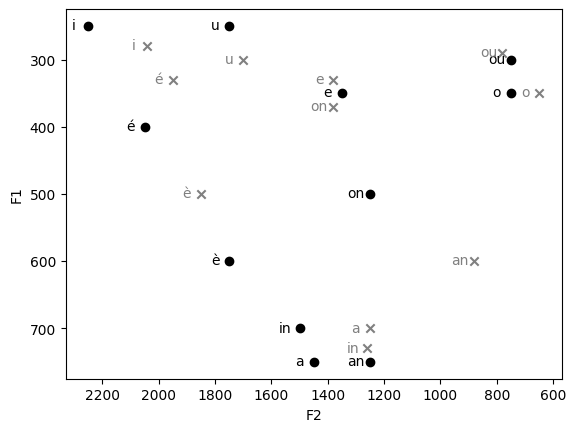

In [13]:
# Vocalic triangle
import matplotlib.pyplot as plt

def plot_vocalic_triangle(ax, standard_formants=True, by_formants=False):
    """ Plot vocalic triangle with reference vowels

        return: axes
    """
    ax.invert_yaxis()
    ax.invert_xaxis()
    
    # plot reference vowels
    for v in vowels:
        if standard_formants:
            f1 = vowels[v].F1
            f2 = vowels[v].F2
            ax.scatter(f2, f1, label=v, c='black', marker='o')
            ax.text(f2 + 50 , f1 + 5, v, ha="center")
            
        if by_formants:
            f1 = vowels[v].F1_by
            f2 = vowels[v].F2_by
            ax.scatter(f2, f1, label=v, c='grey', marker='x')
            ax.text(f2 + 50 , f1 + 5, v, ha="center", c='grey')
    
        ax.set_xlabel('F2')
        ax.set_ylabel('F1')


ax = plt.axes()
plot_vocalic_triangle(ax, standard_formants=True, by_formants=True)


Text(0.5, 0.98, 'All trials')

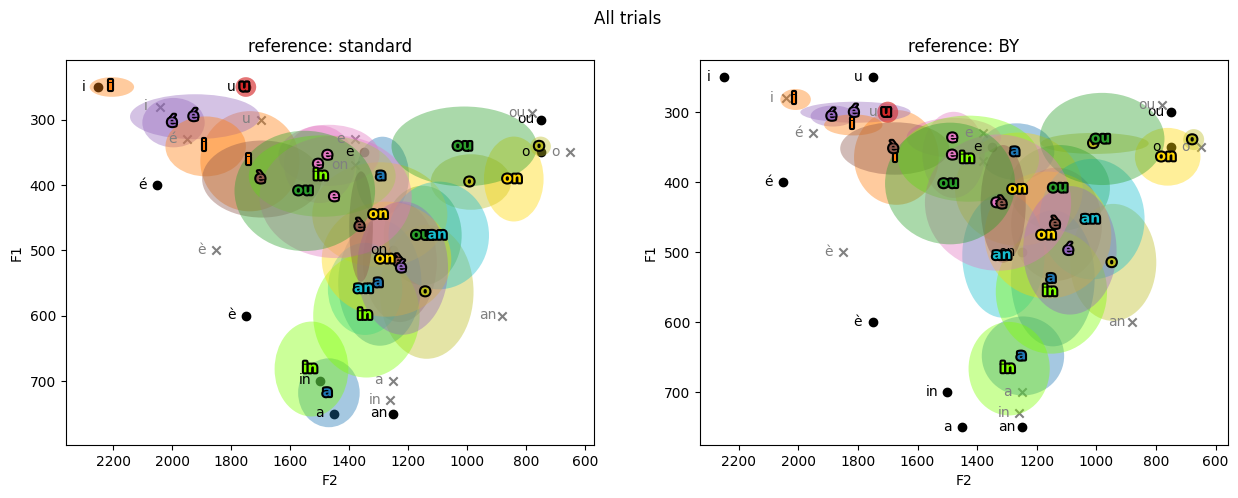

In [14]:
# plot cloud of answered vowels
from typing import Tuple
from statistics import stdev, mean

def trial_stats(realisations: list[Trial], reference='standard', answer='answer1') -> Tuple[Tuple[float, float], Tuple[float, float]]:
    """ Mean and standard deviation of the realisations of a trial
    
        reference = 'standard' (default) | 'by'
    """
    def formants(vowel, reference='standard'):
        f1 = vowels[vowel].F1 if reference=='standard' else vowels[vowel].F1_by
        f2 = vowels[vowel].F2 if reference=='standard' else vowels[vowel].F2_by
        return f1, f2
        
    real_vowels_closest = [t.answer2 for t in realisations] if answer == 'answer2' else [t.answer1 for t in realisations]
    predicted_formants = [formants(v, reference=reference) for v in real_vowels_closest]

    formants_f1 = [f1 for f1, f2 in predicted_formants]
    formants_f2 = [f2 for f1, f2 in predicted_formants]
    
    return (mean(formants_f1), mean(formants_f2)), (stdev(formants_f1), stdev(formants_f2))


    
from matplotlib.patches import Ellipse
import matplotlib.patheffects as path_effects

VOWEL_COLOR_MAP = {'a': 'tab:blue',
                   'i': 'tab:orange',
                   'ou': 'tab:green',
                   'u': 'tab:red',
                   'é': 'tab:purple',
                   'è': 'tab:brown',
                   'e': 'tab:pink',
                   'o': 'tab:olive',
                   'an': 'tab:cyan',
                   'on': 'gold',
                   'in': 'chartreuse',
                  }


def plot_trials(ax, trial_selection, min_spread=(30,70), vocalic_triangle=True, color_map=VOWEL_COLOR_MAP, reference='standard', tags=['vowel'], answer='answer1'):
    # plot vocalic triangle
    if vocalic_triangle:
        plot_vocalic_triangle(ax, standard_formants=True, by_formants=True)
    
    # plot a point with mean estimated F1,F2 for each trial
    for i in range(len(trials)):
        realisations = trial_selection.where(Trial.index==i)[:]
        if len(realisations) == 0:
            continue
            
        truth = realisations[0].truth
        (f1, f2), (std_f1, std_f2) = trial_stats(realisations, reference=reference, answer=answer)
        
        ellipse = Ellipse(xy=(f2,f1),
                          width=std_f2 if std_f2 > min_spread[1] else min_spread[1],
                          height=std_f1 if std_f1 > min_spread[0] else min_spread[0],
                          facecolor=color_map[truth],
                          alpha=0.4,
                          fill=True,
        )
        
        ax.add_patch(ellipse)

        # compute label to display for each trial
        labels = []
        if 'vowel' in tags:
            labels.append(truth)
        if 'assist' in tags:
            labels.append(str(realisations[0].assist))
        
        text = ax.text(f2 + 5, f1 + 5, ' '.join(labels), ha="center", c=color_map[truth], fontweight='bold')
        text.set_path_effects([path_effects.Stroke(linewidth=3, foreground='black'),
                               path_effects.Normal()])
        

def plot_trials_both_ref(trial_selection, *args, **kwargs):
    fig, axs = plt.subplots(1, 2, figsize=(15,5))
    
    plot_trials(axs[0], trial_selection, reference='standard', *args, **kwargs)
    plot_trials(axs[1], trial_selection, reference='by', *args, **kwargs)
    axs[0].set_title('reference: standard')
    axs[1].set_title('reference: BY')

    return fig

    

# plot all trials
all_trials_selection = Trial.select()
fig = plot_trials_both_ref(all_trials_selection)
fig.suptitle('All trials')

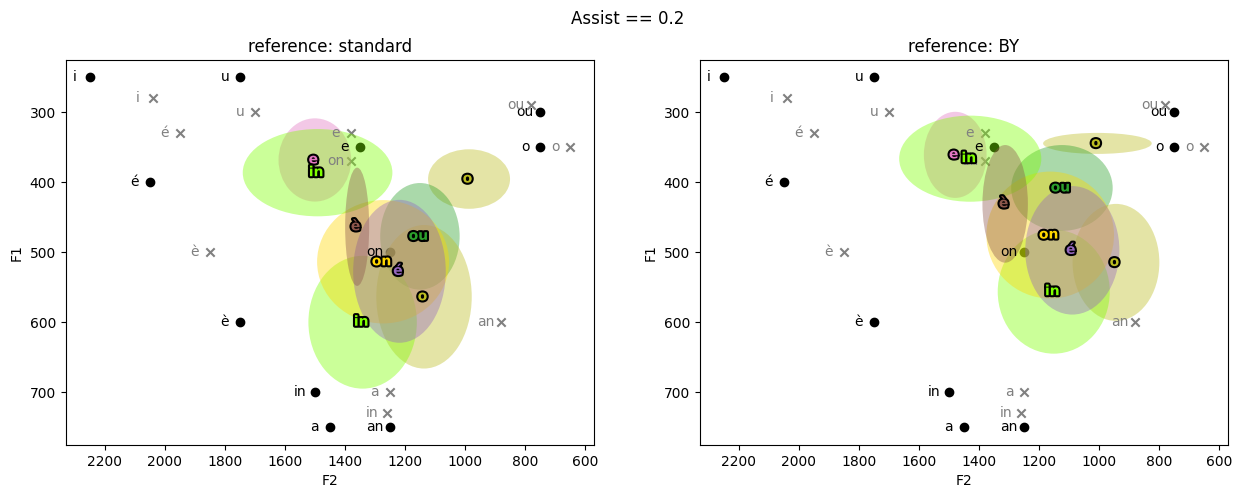

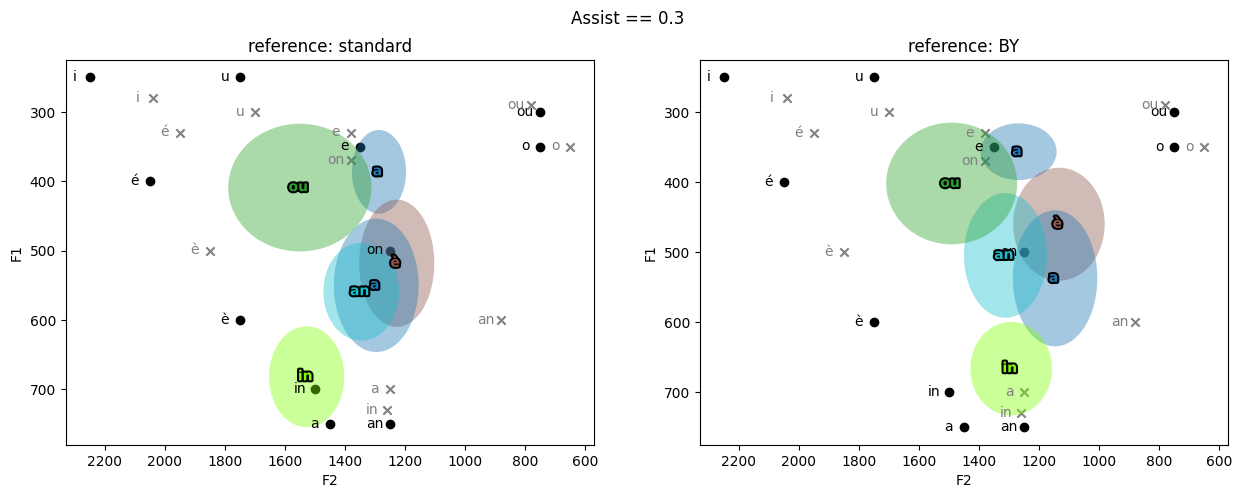

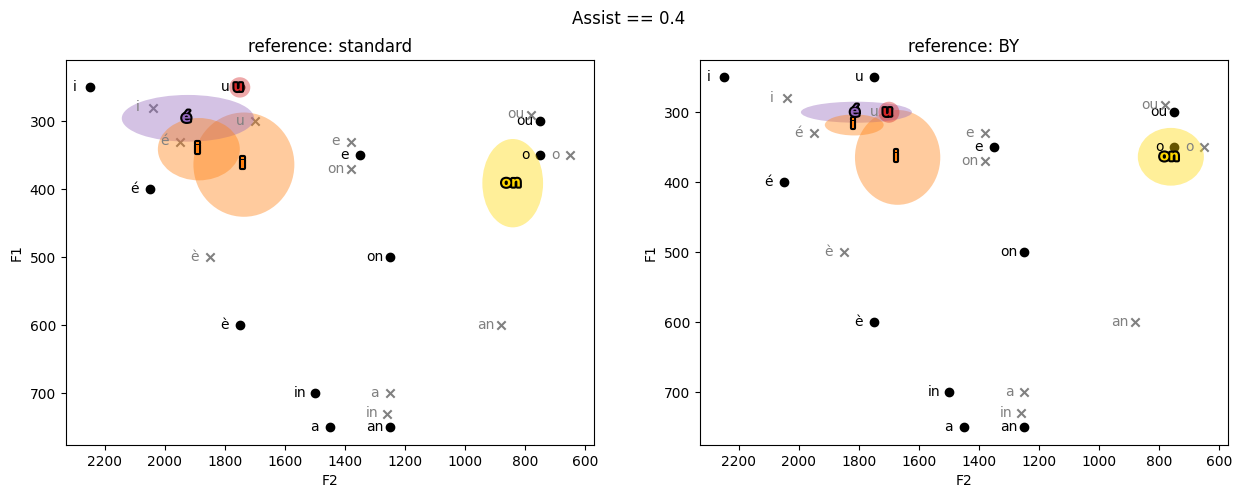

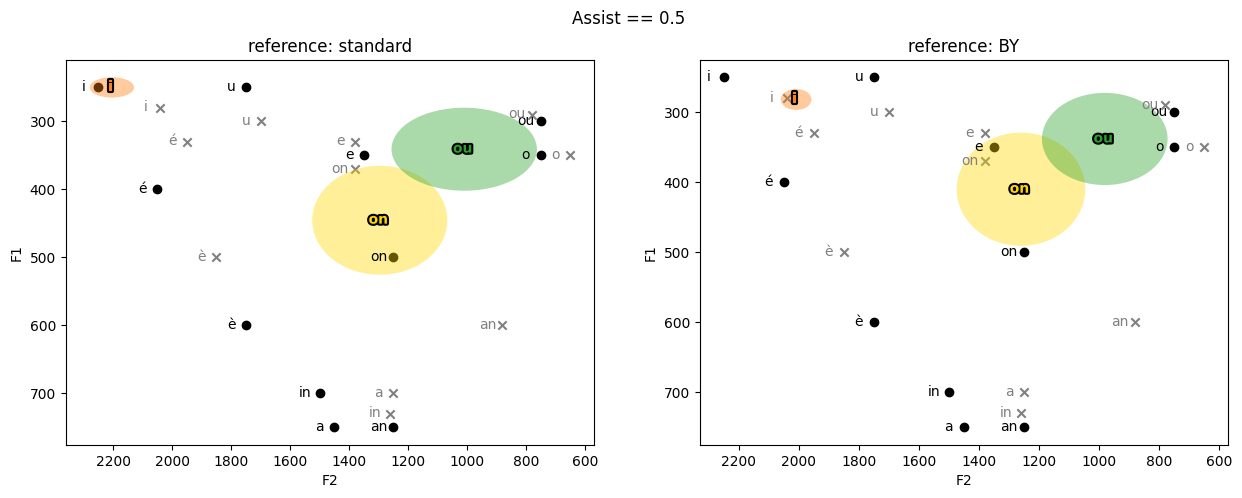

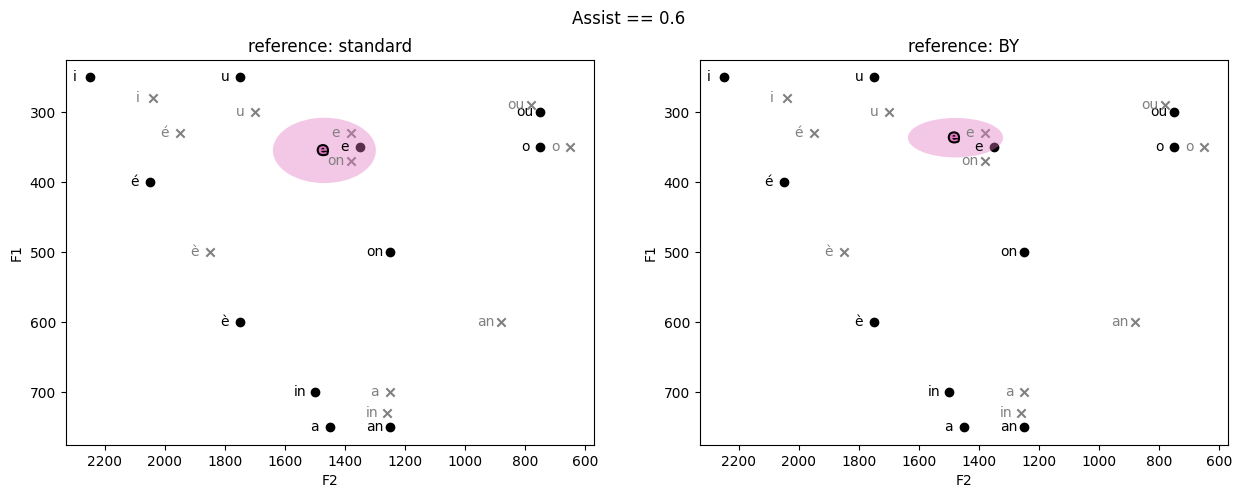

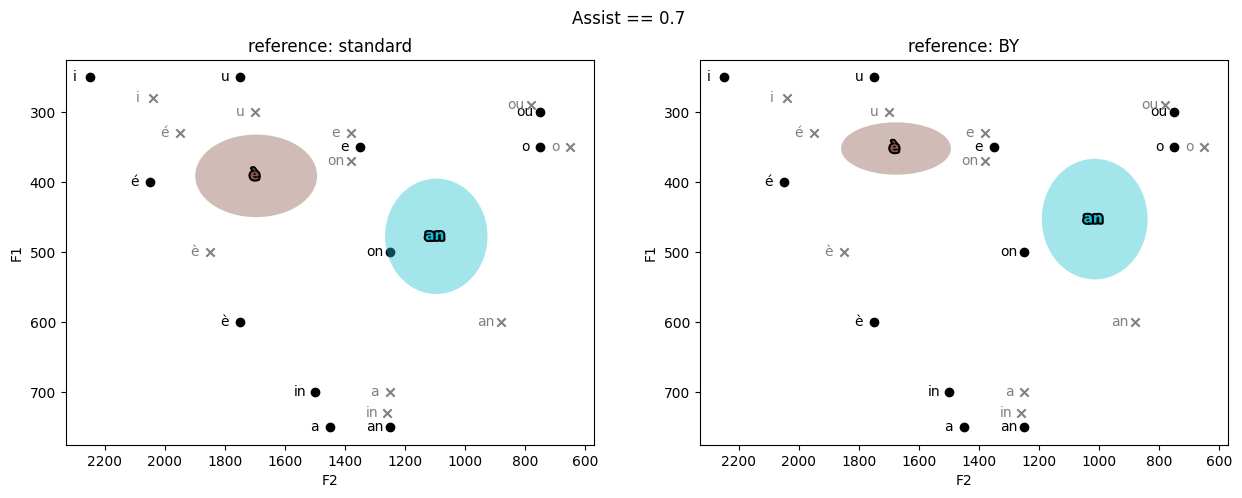

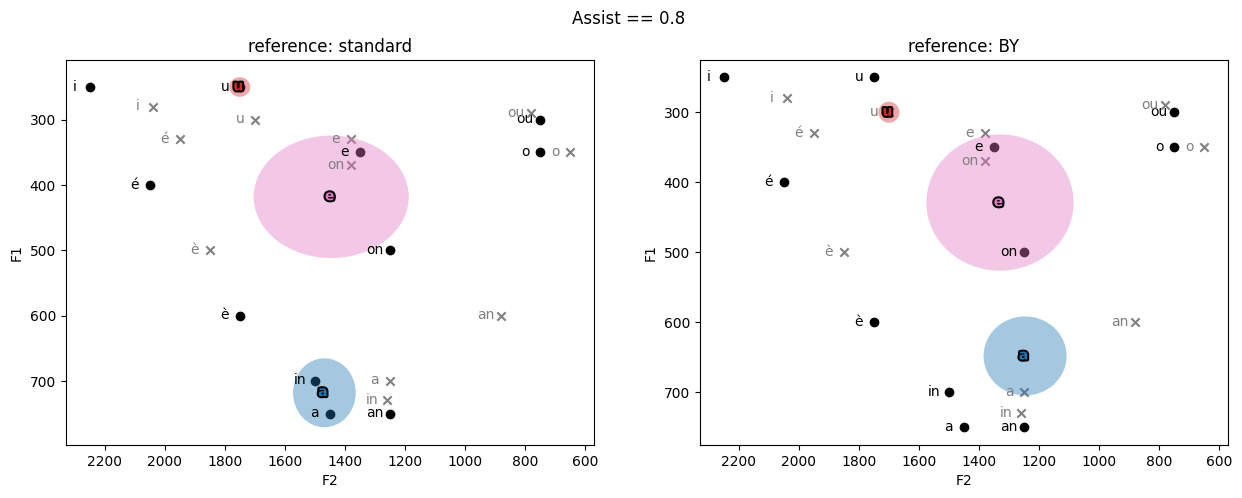

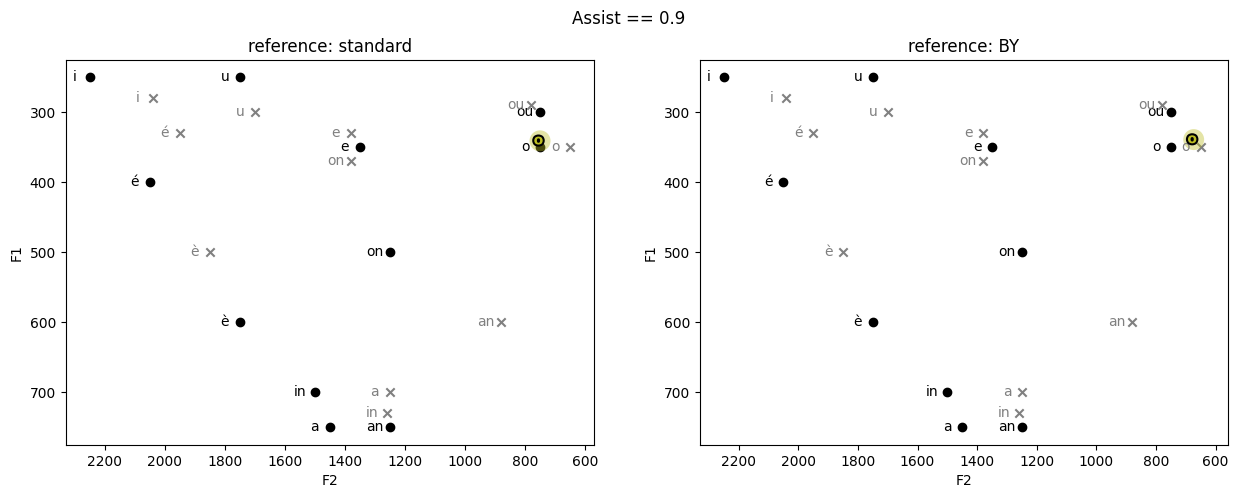

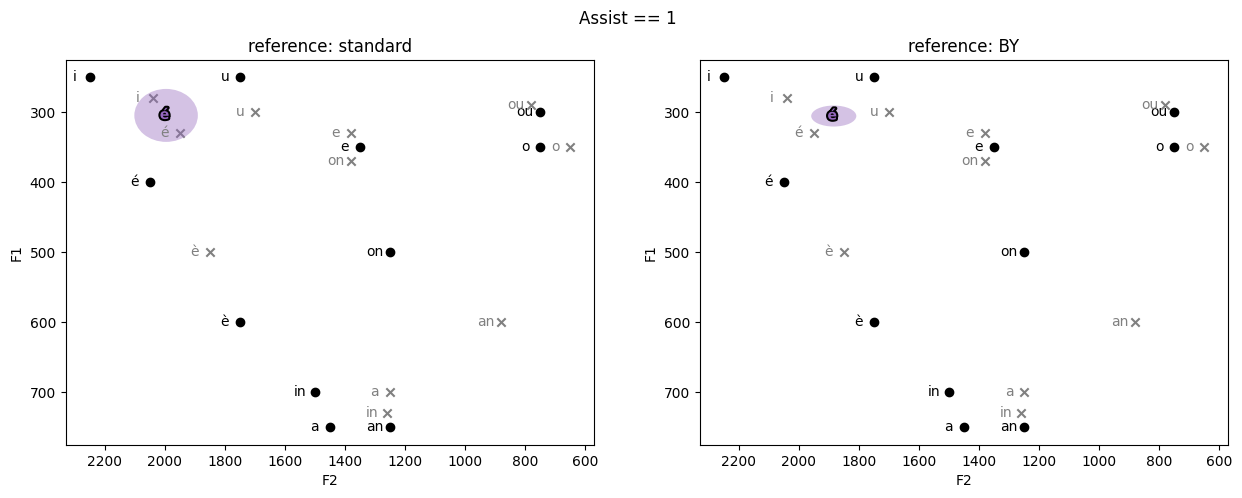

In [15]:
# single plot per assist value

for assist in [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    title = f'Assist == {assist}'
    selection = Trial.select().where(Trial.assist==assist)
    fig = plot_trials_both_ref(selection)
    fig.suptitle(title)

Text(0.5, 0.98, 'Non nasal vowels')

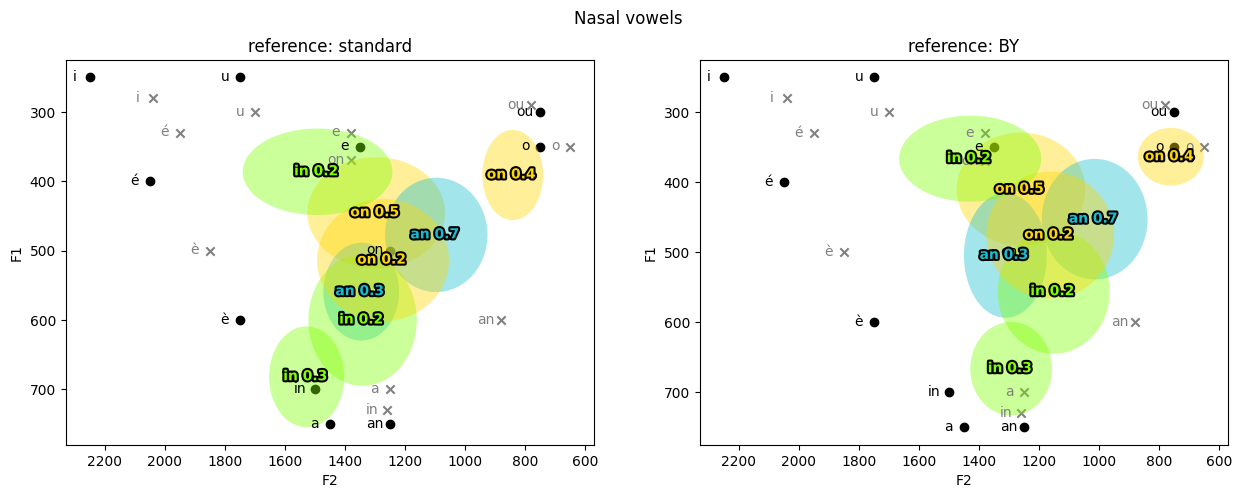

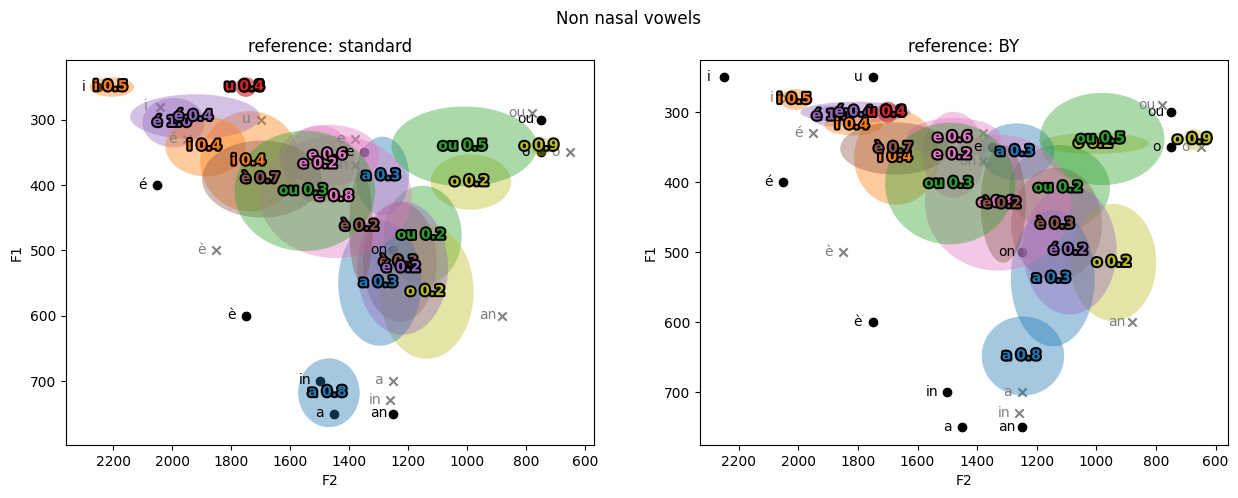

In [16]:
# split nasal and non nasal vowels

title = 'Nasal vowels'
selection = Trial.select().where( (Trial.truth=='an') | (Trial.truth=='in') | (Trial.truth=='on') )
fig = plot_trials_both_ref(selection, tags=['vowel', 'assist'])
fig.suptitle(title)

title = 'Non nasal vowels'
selection = Trial.select().where( ~((Trial.truth=='an') | (Trial.truth=='in') | (Trial.truth=='on')) )
fig = plot_trials_both_ref(selection, tags=['vowel', 'assist'])
fig.suptitle(title)

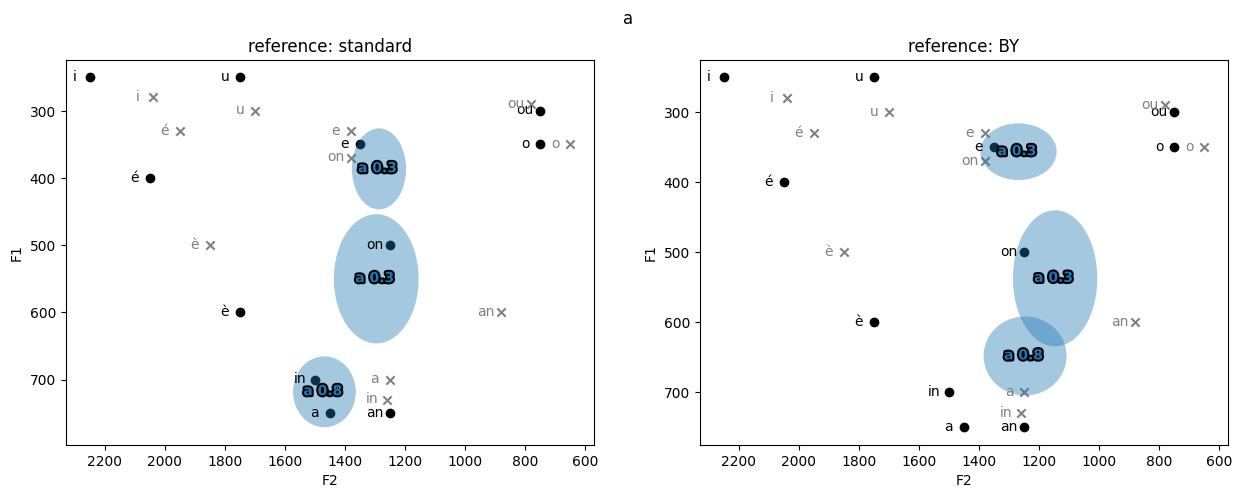

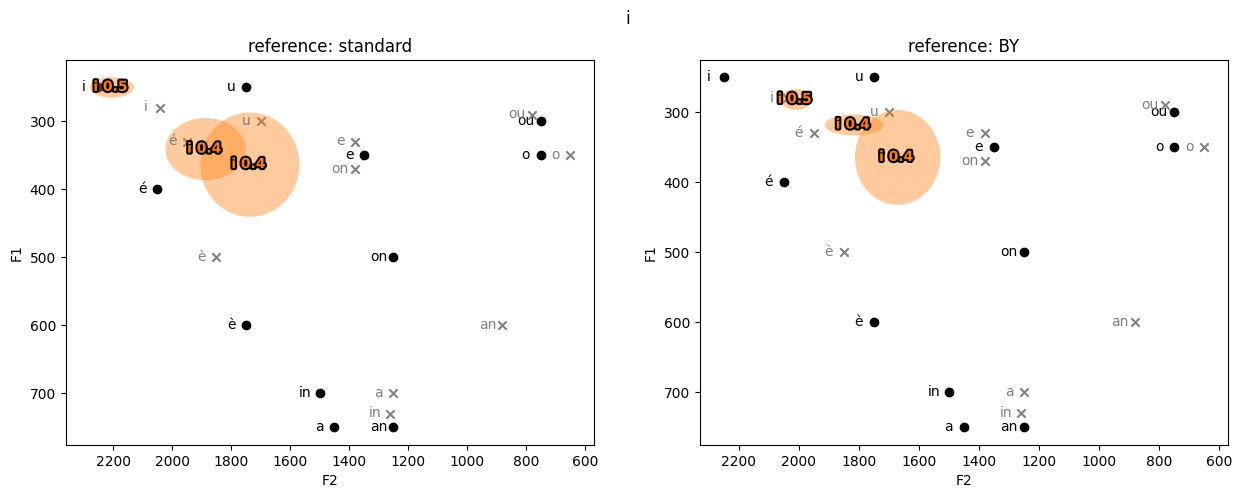

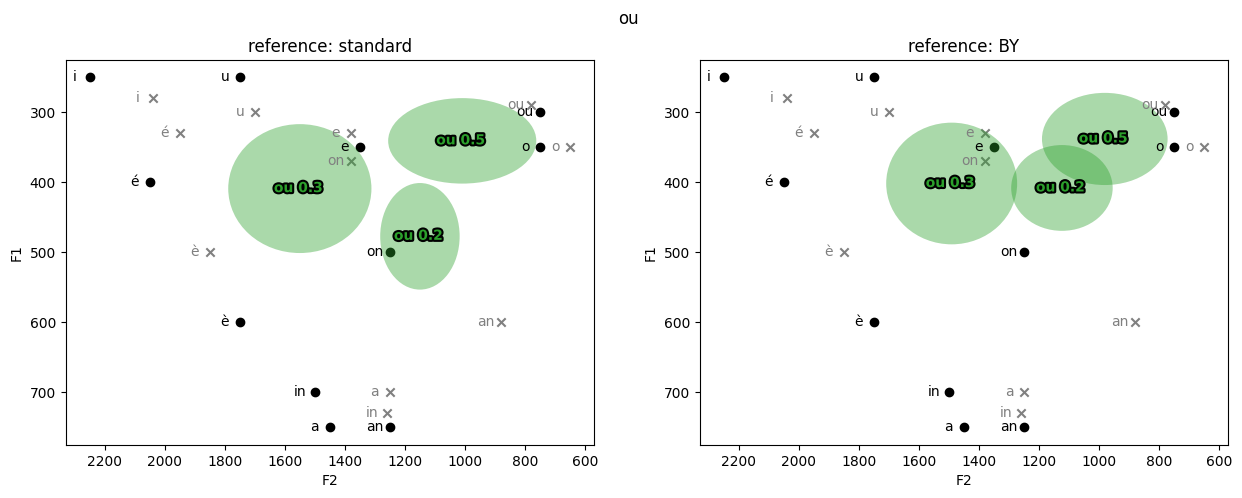

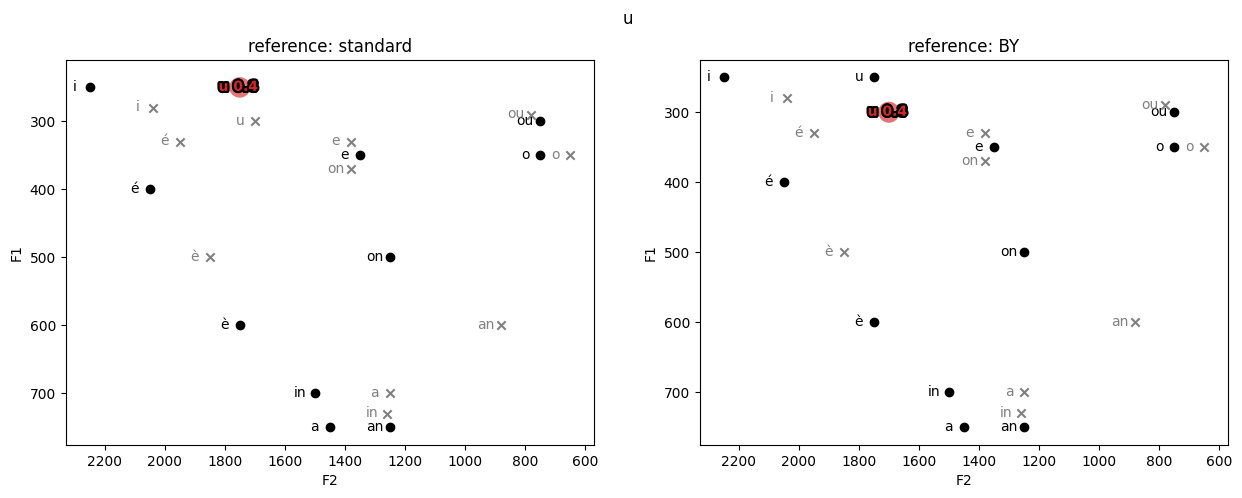

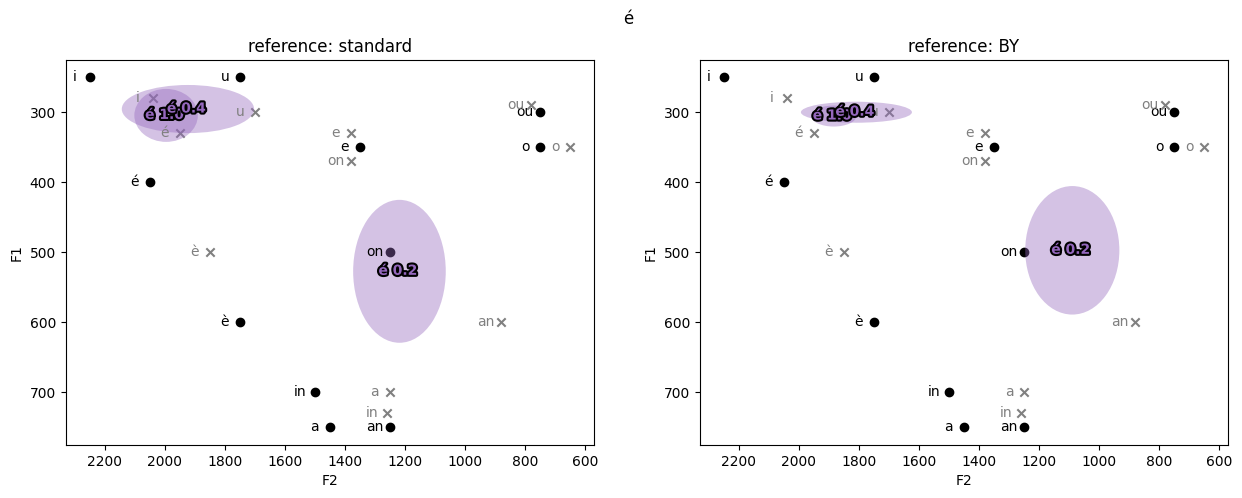

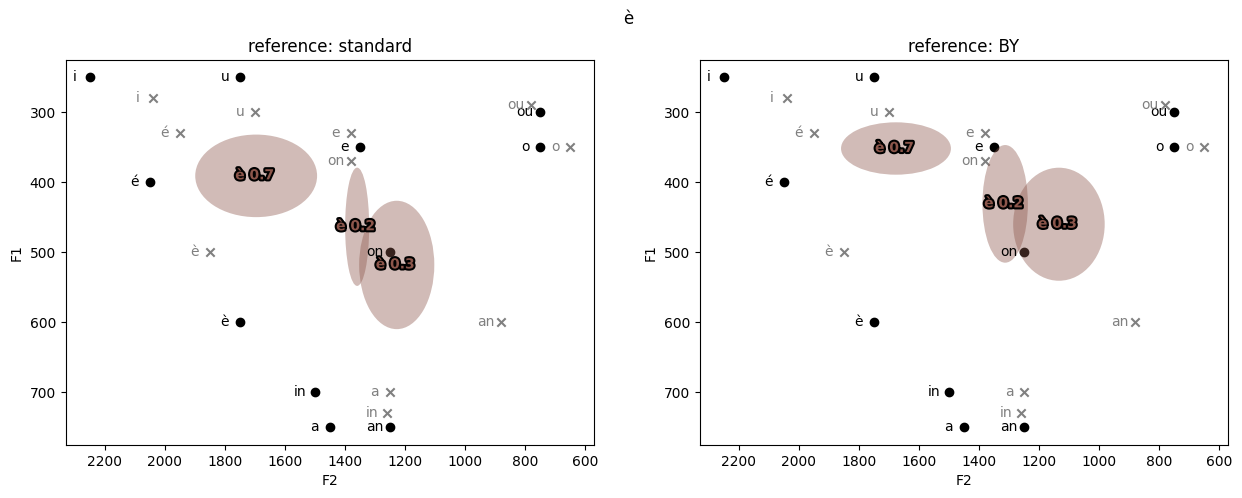

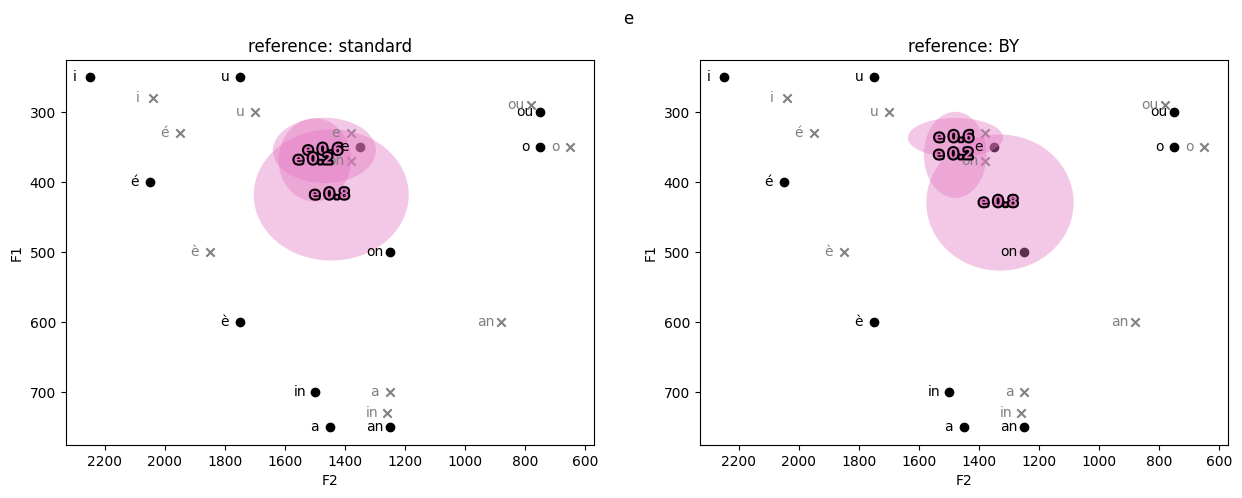

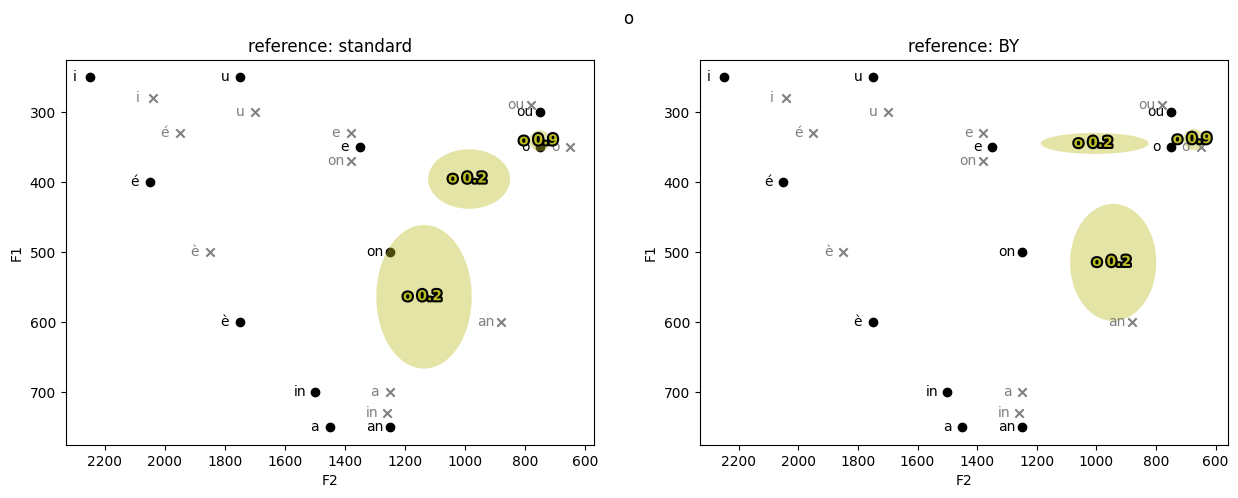

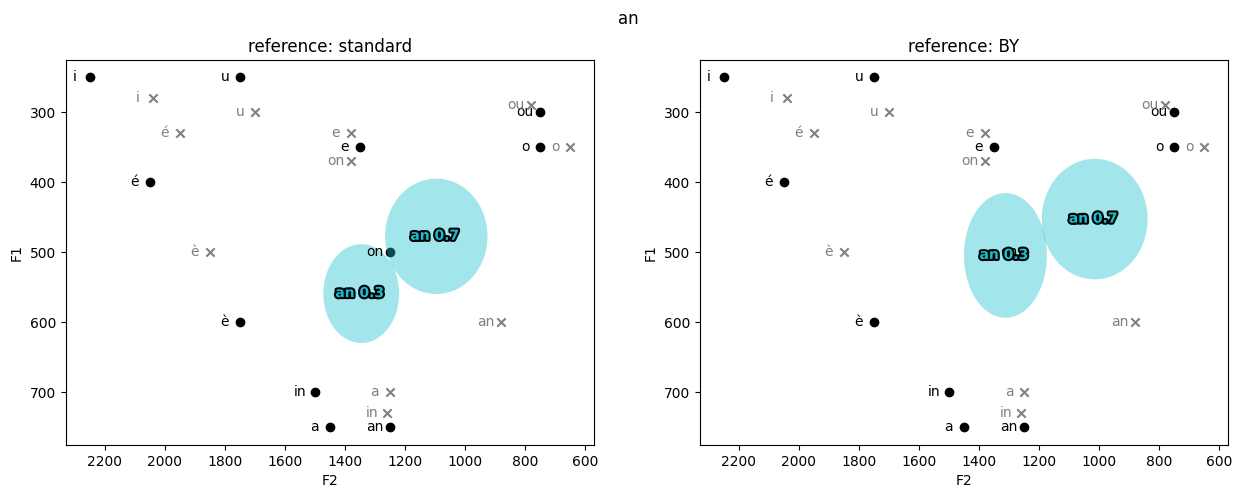

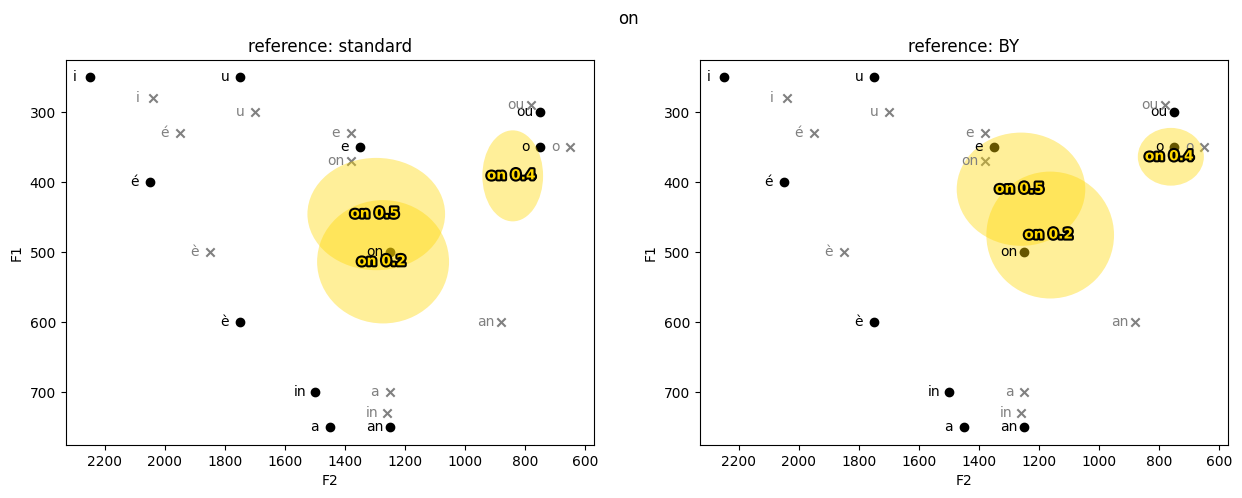

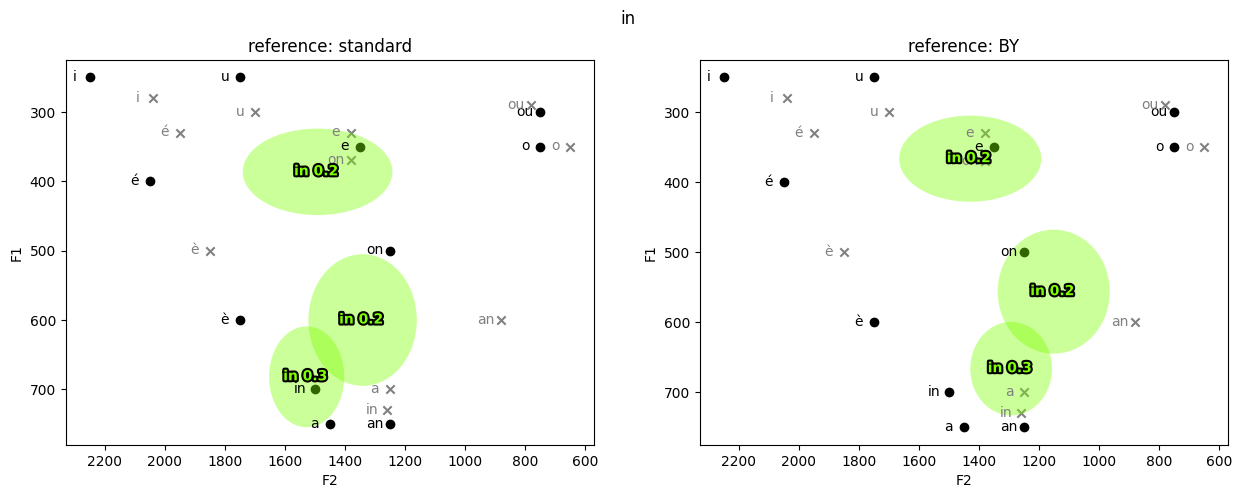

In [17]:
# single plot per vowel

for v in vowels:
    selection = Trial.select().where(Trial.truth==v)
    fig = plot_trials_both_ref(selection, tags=['vowel', 'assist'])
    fig.suptitle(v)

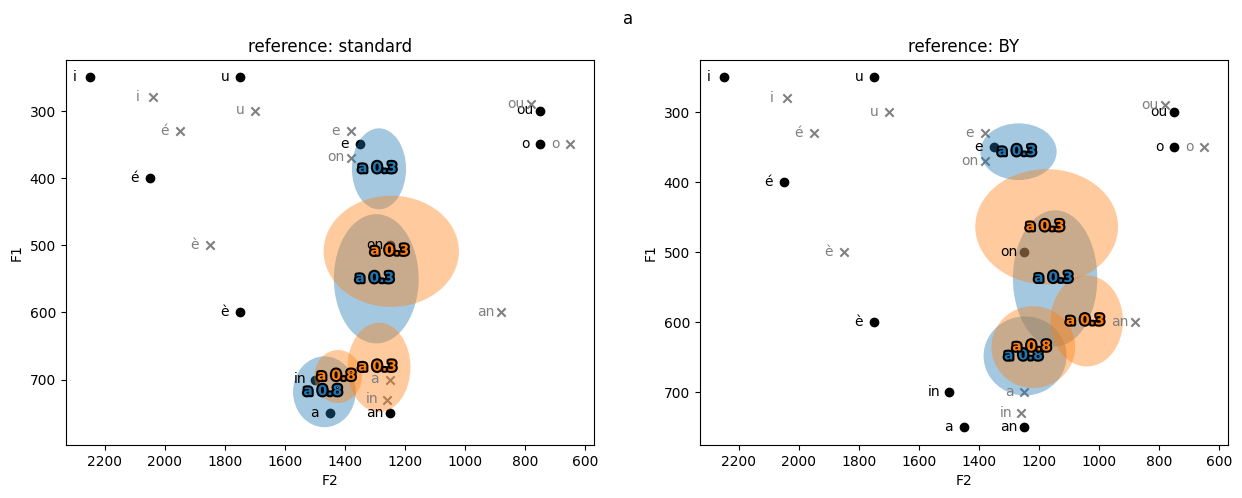

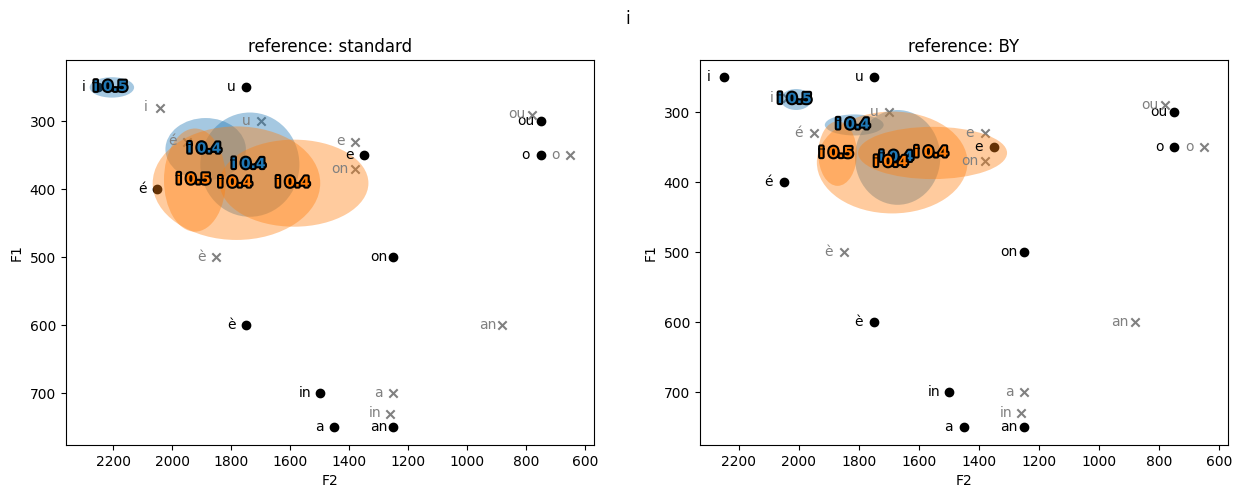

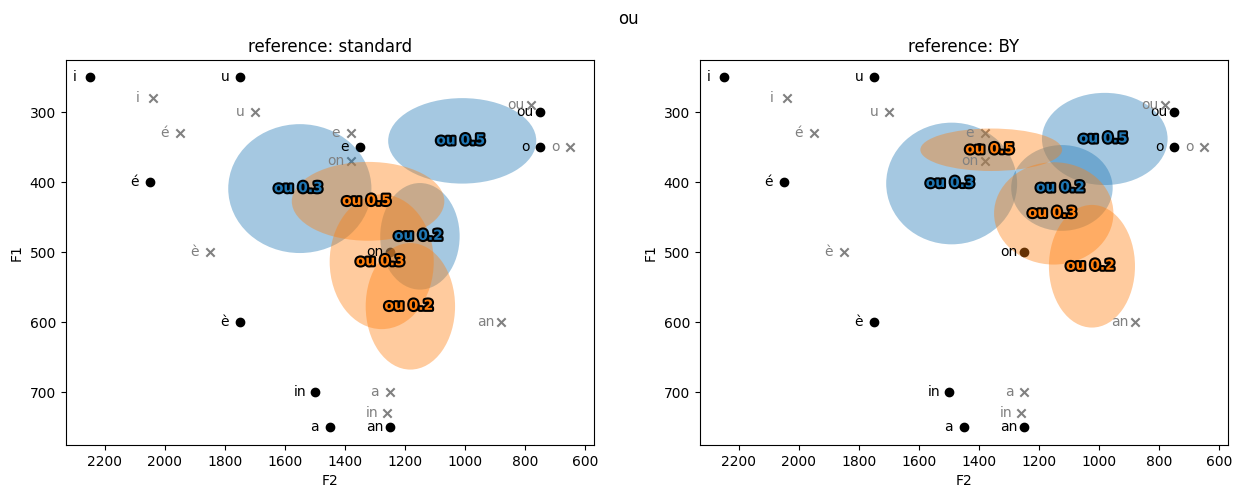

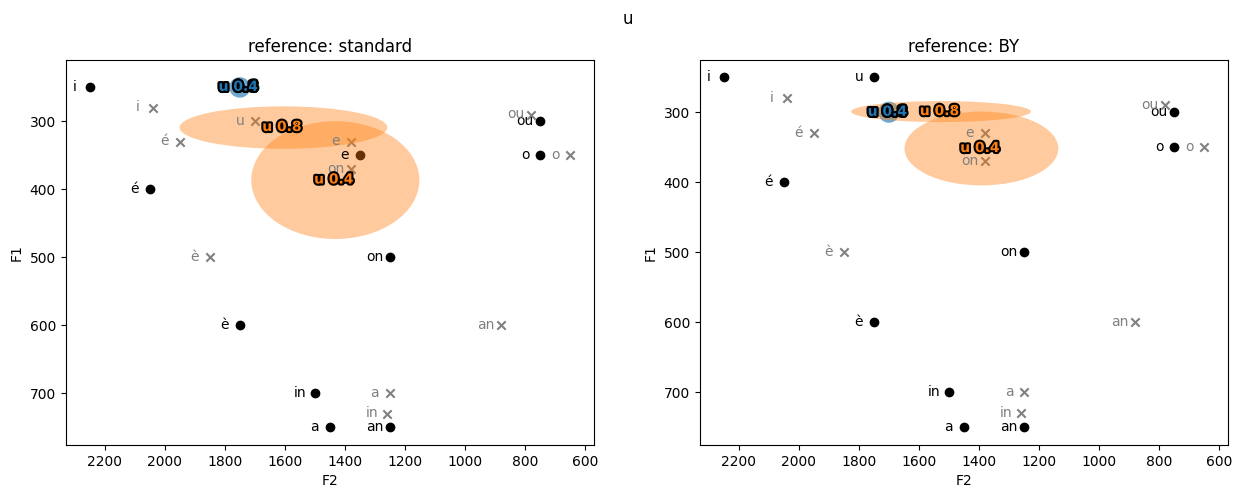

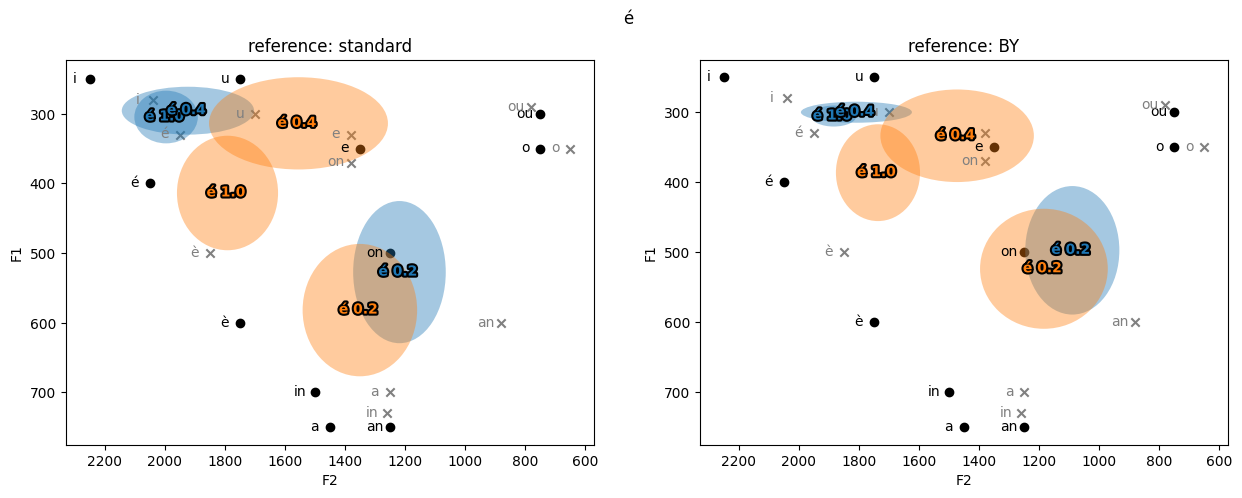

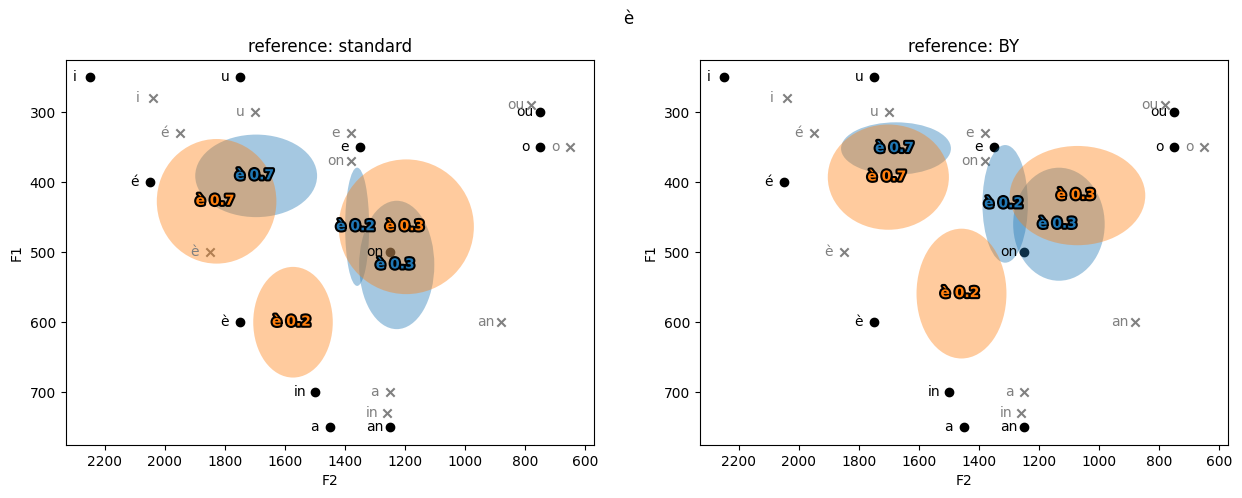

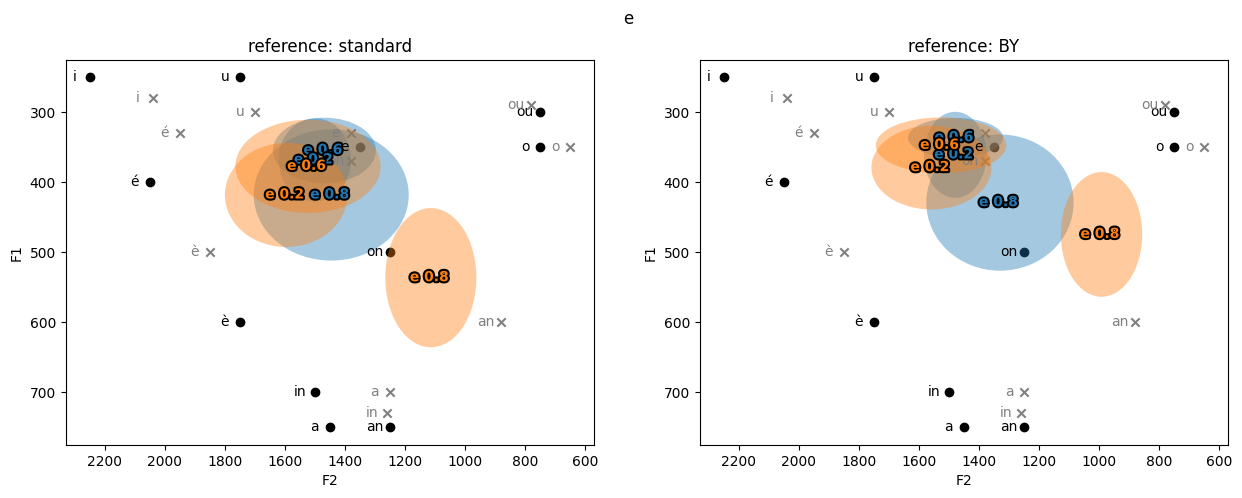

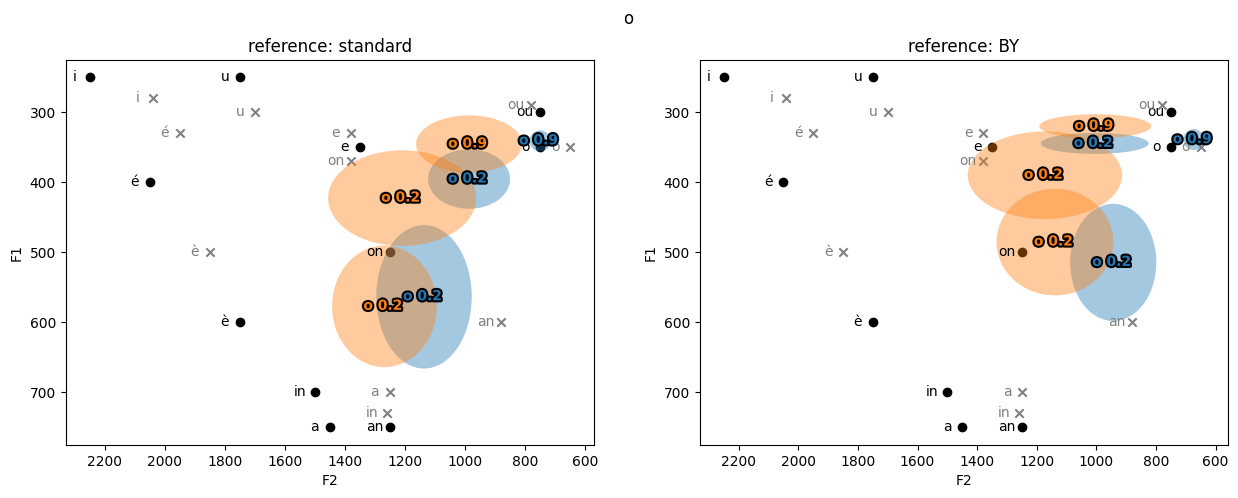

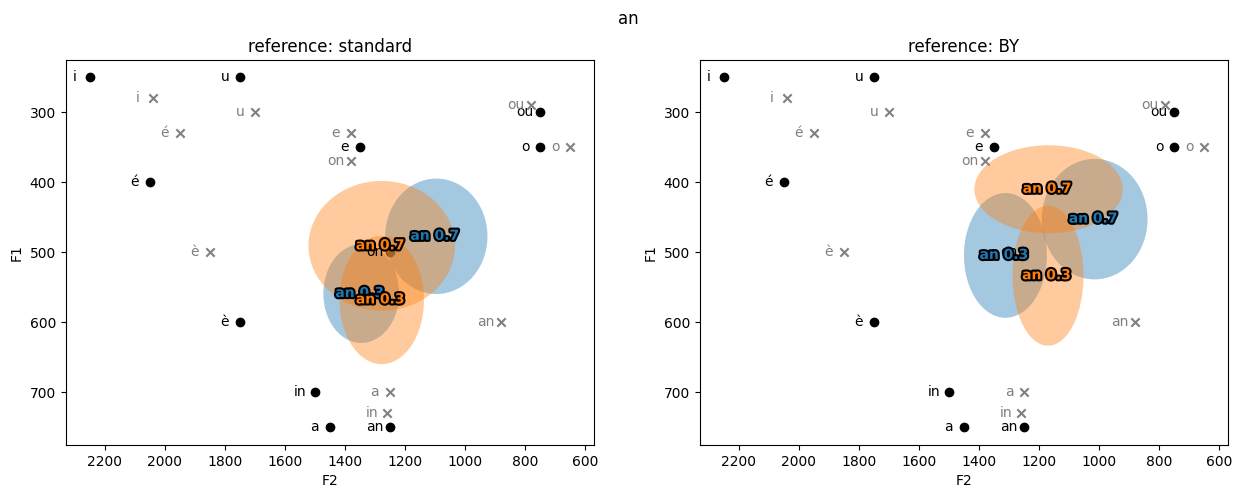

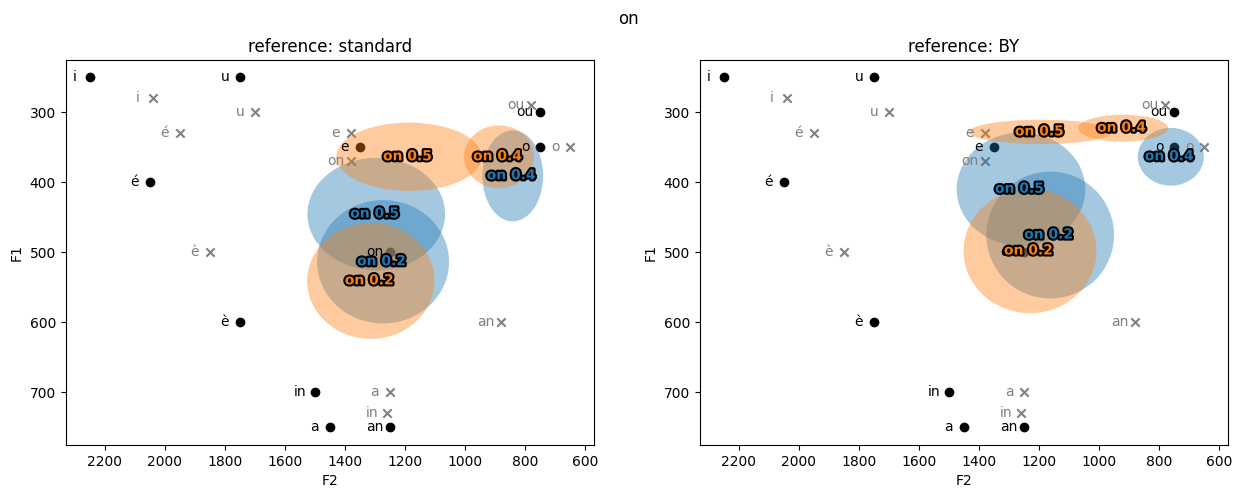

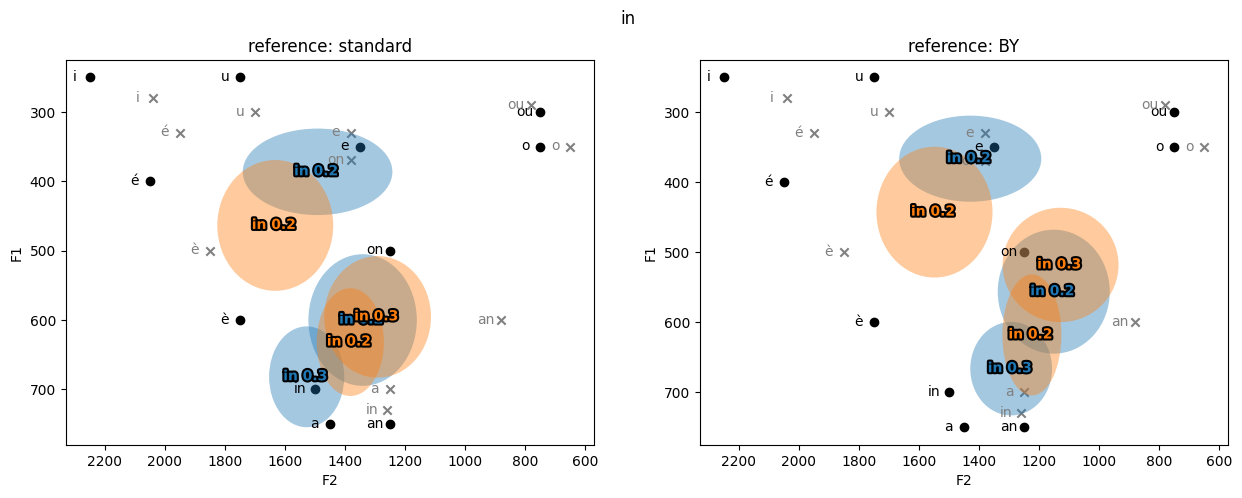

In [18]:
# plot closest and second closest vowels

ALL_BLUE = {key: 'tab:blue' for key in VOWEL_COLOR_MAP}
ALL_ORANGE = {key: 'tab:orange' for key in VOWEL_COLOR_MAP}

def plot_closest_and_second_trials_both_ref(trial_selection, *args, **kwargs):
    fig, axs = plt.subplots(1, 2, figsize=(15,5))
    
    plot_trials(axs[0], trial_selection, reference='standard', answer='answer1', color_map=ALL_BLUE, *args, **kwargs)
    plot_trials(axs[0], trial_selection, vocalic_triangle=False, reference='standard', answer='answer2', color_map=ALL_ORANGE, *args, **kwargs)

    plot_trials(axs[1], trial_selection, reference='by', answer='answer1', color_map=ALL_BLUE, *args, **kwargs)
    plot_trials(axs[1], trial_selection, vocalic_triangle=False, reference='by', answer='answer2', color_map=ALL_ORANGE, *args, **kwargs)

    axs[0].set_title('reference: standard')
    axs[1].set_title('reference: BY')

    return fig

for v in vowels:
    selection = Trial.select().where(Trial.truth==v)
    fig = plot_closest_and_second_trials_both_ref(selection, tags=['vowel', 'assist'])
    fig.suptitle(v)



/tmp/ipykernel_9164/1471558336.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(1, 2, figsize=(15,5))


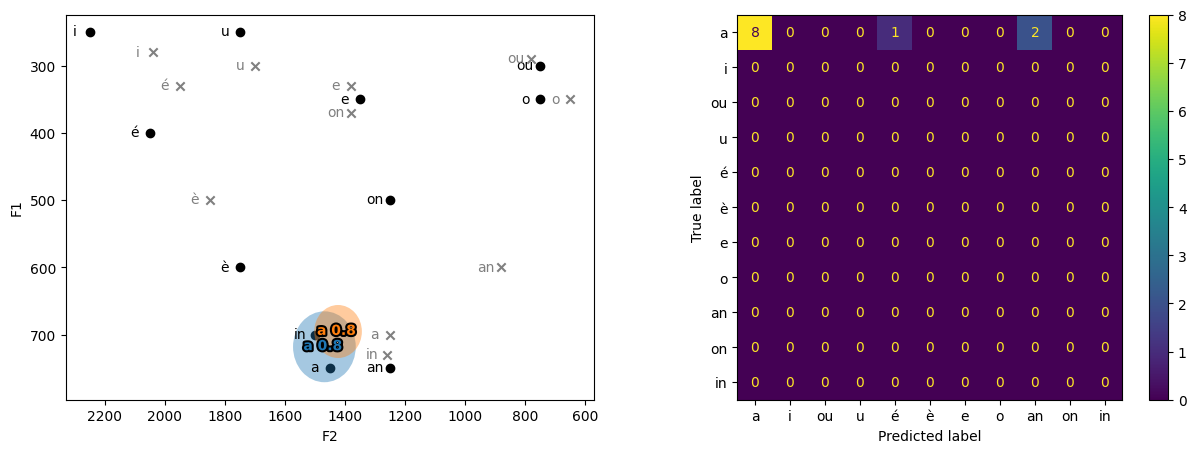

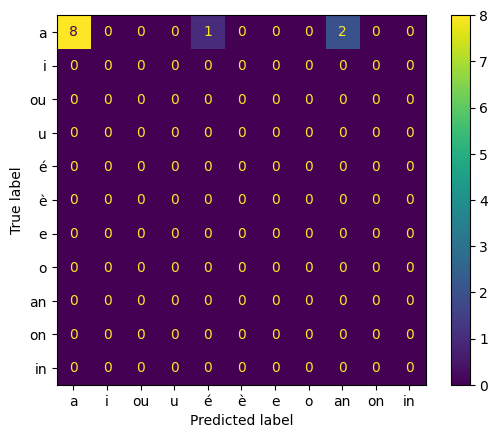

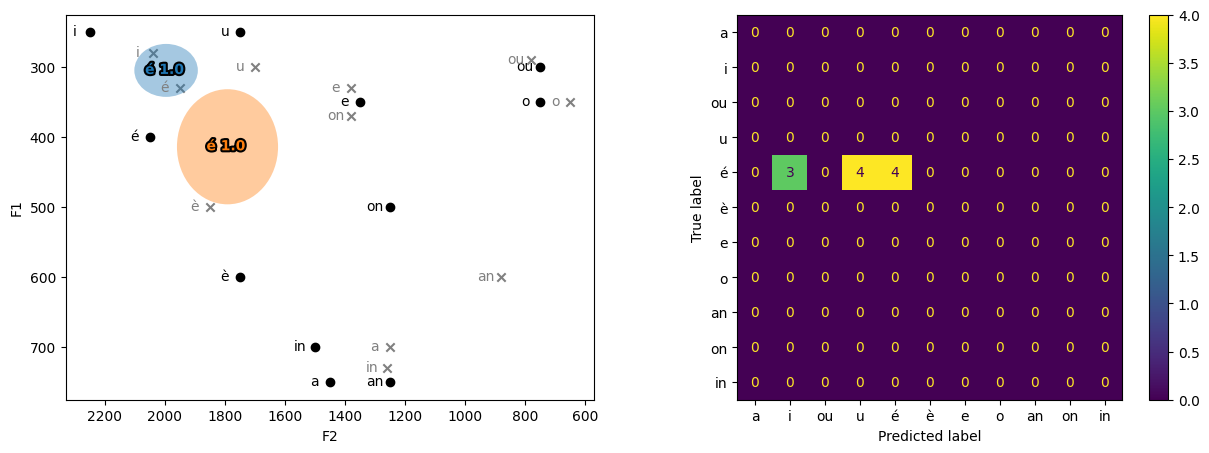

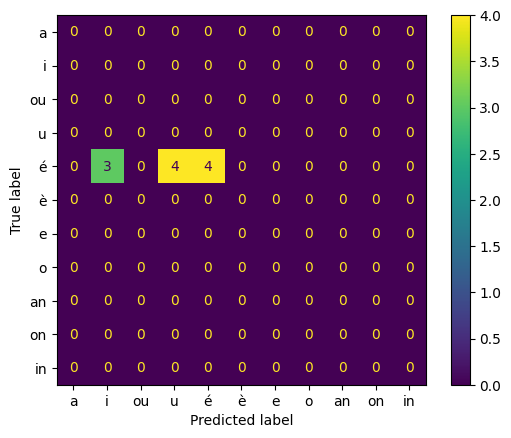

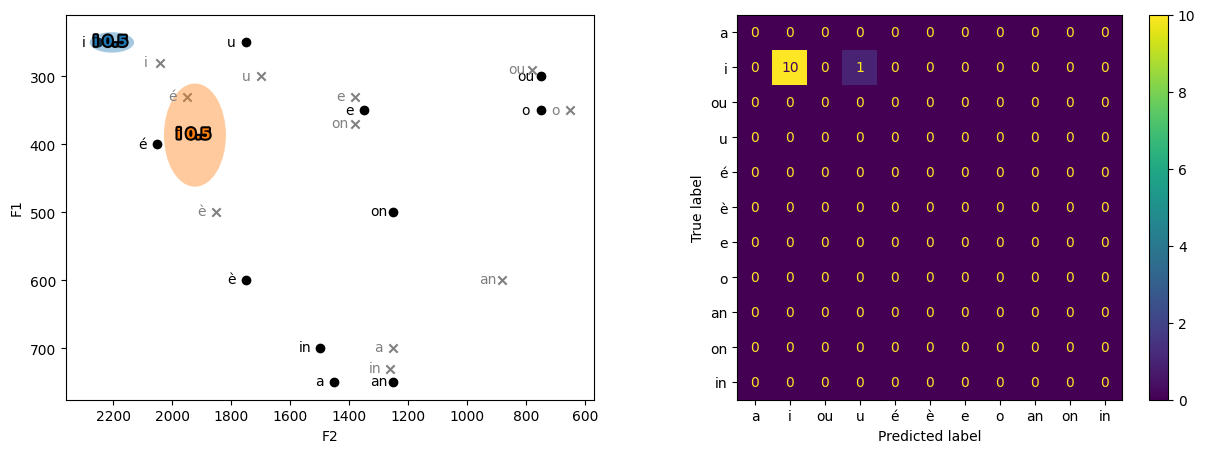

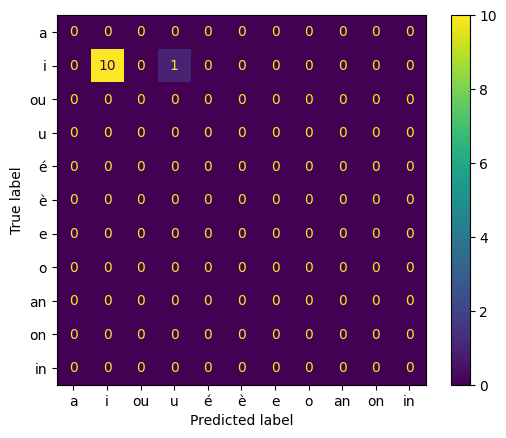

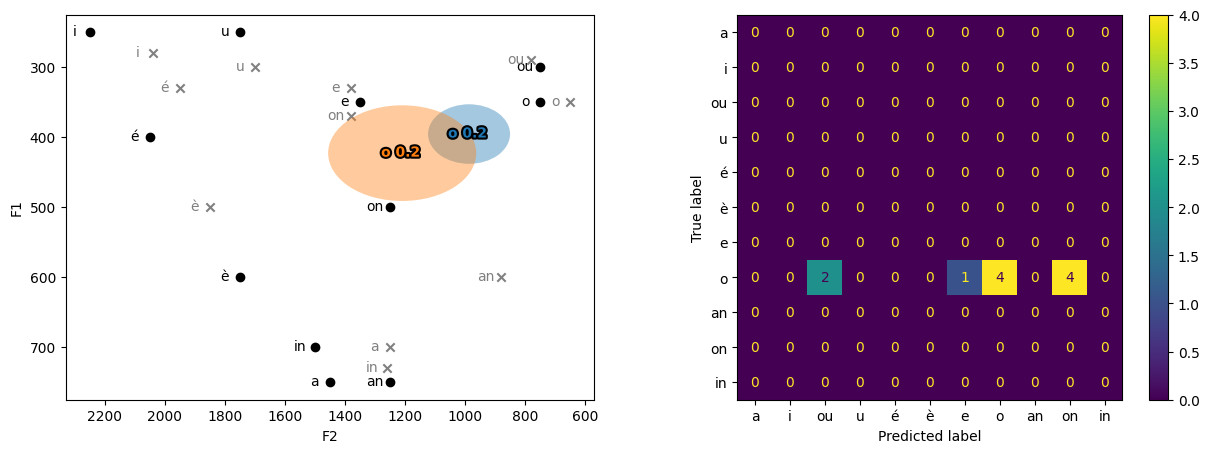

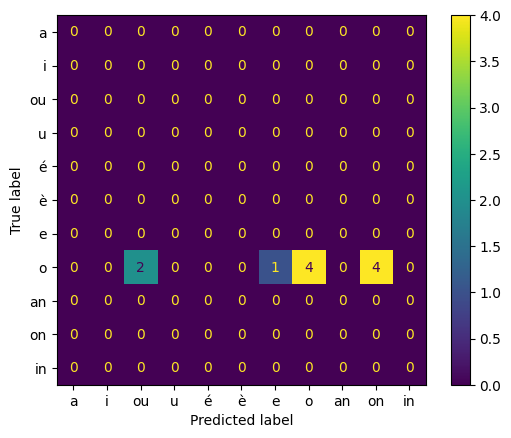

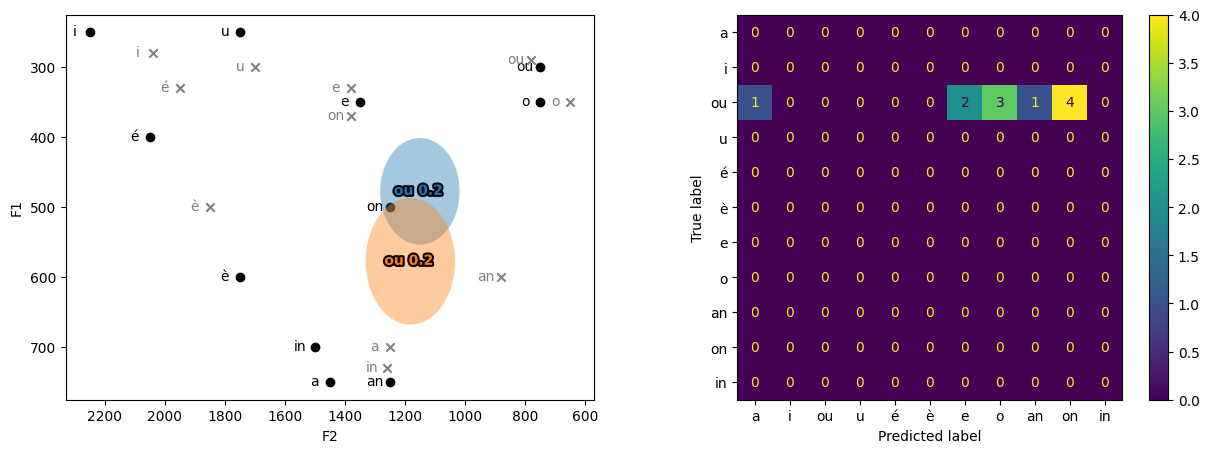

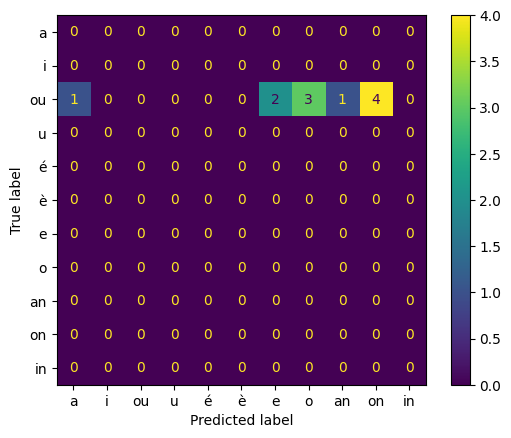

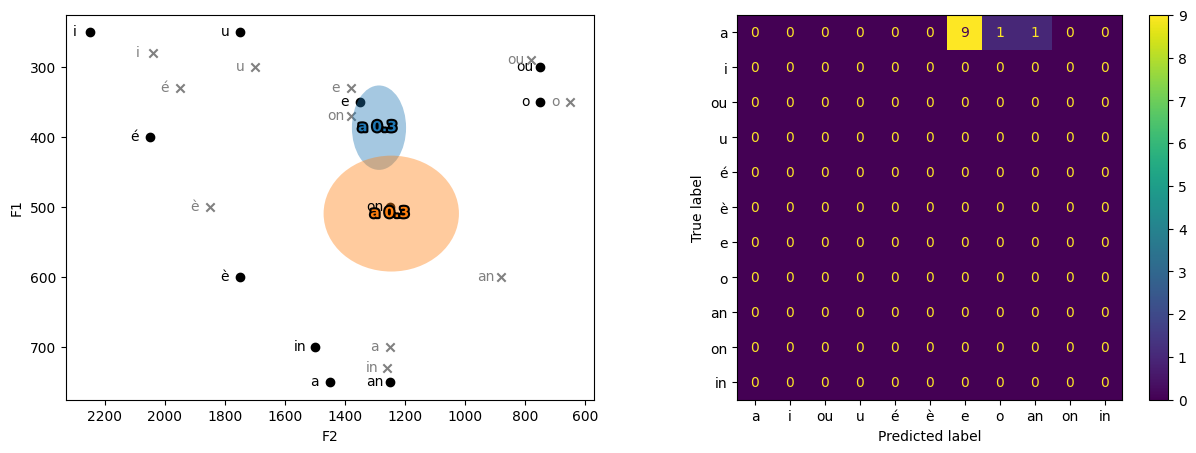

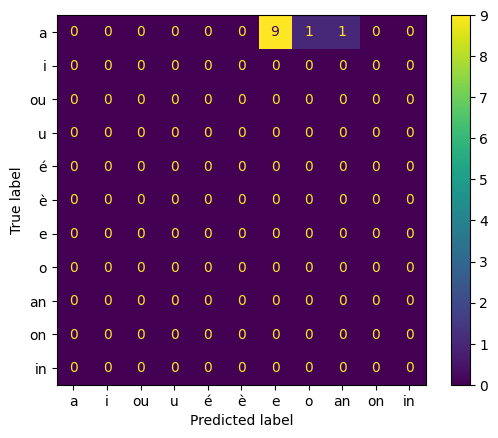

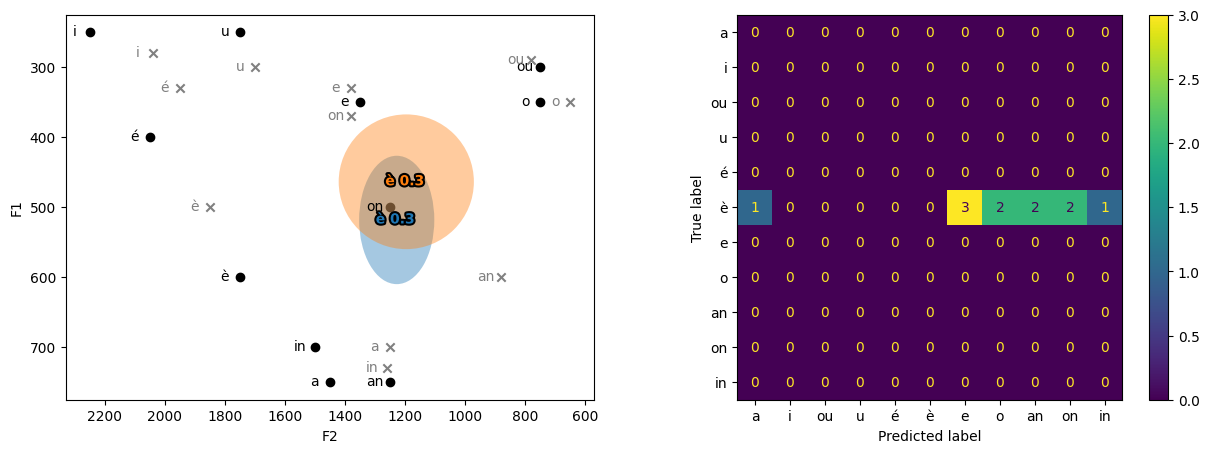

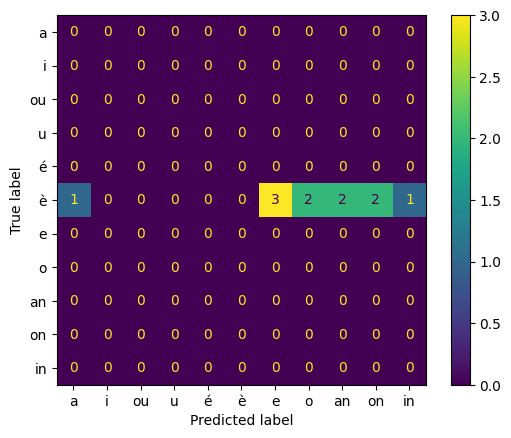

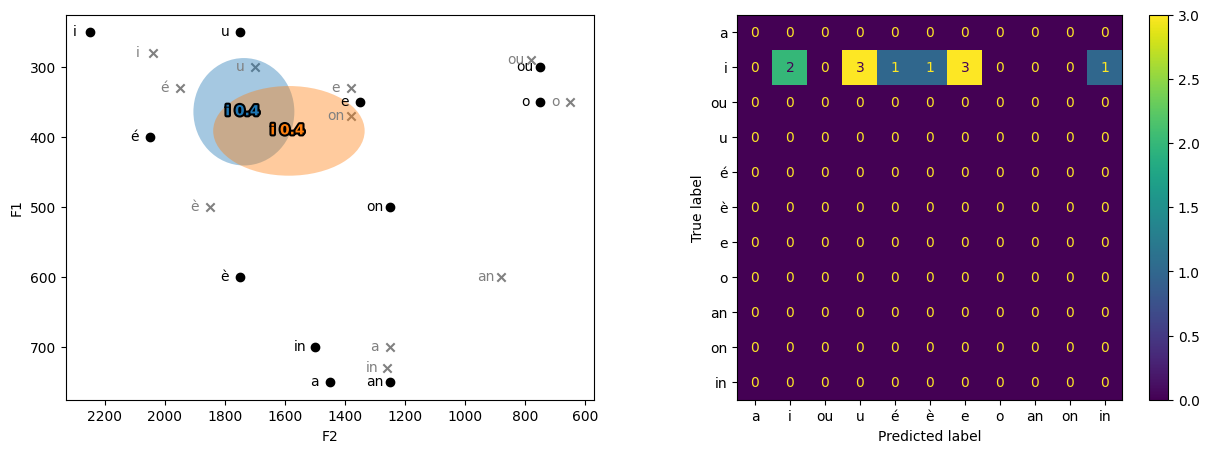

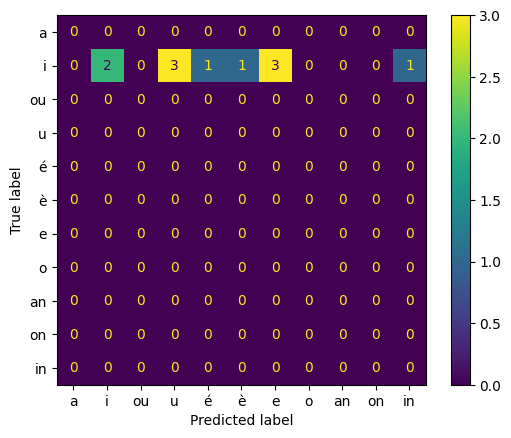

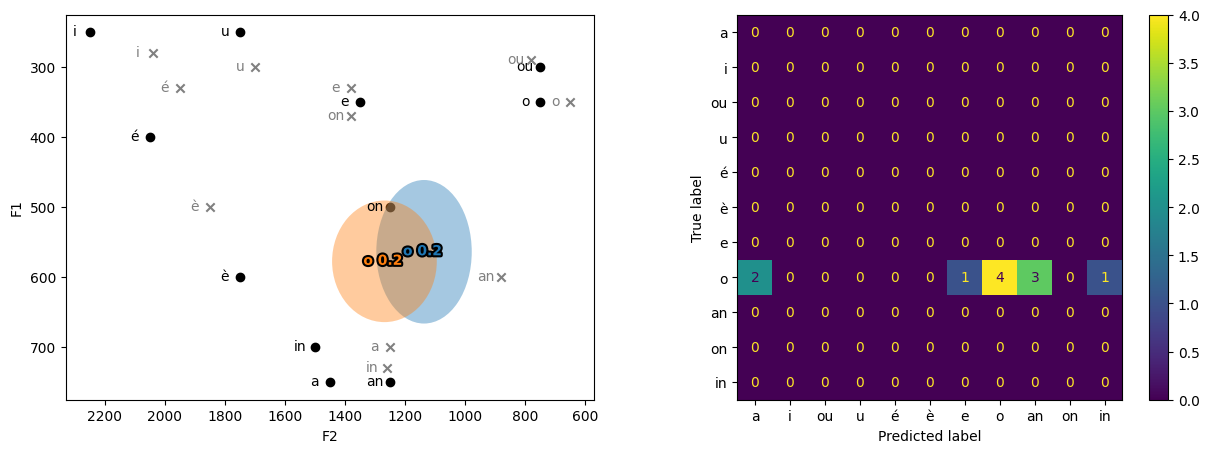

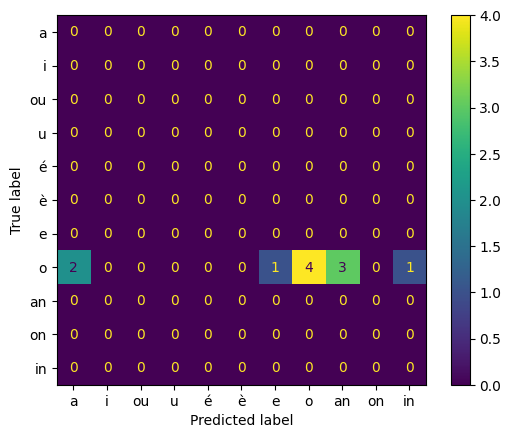

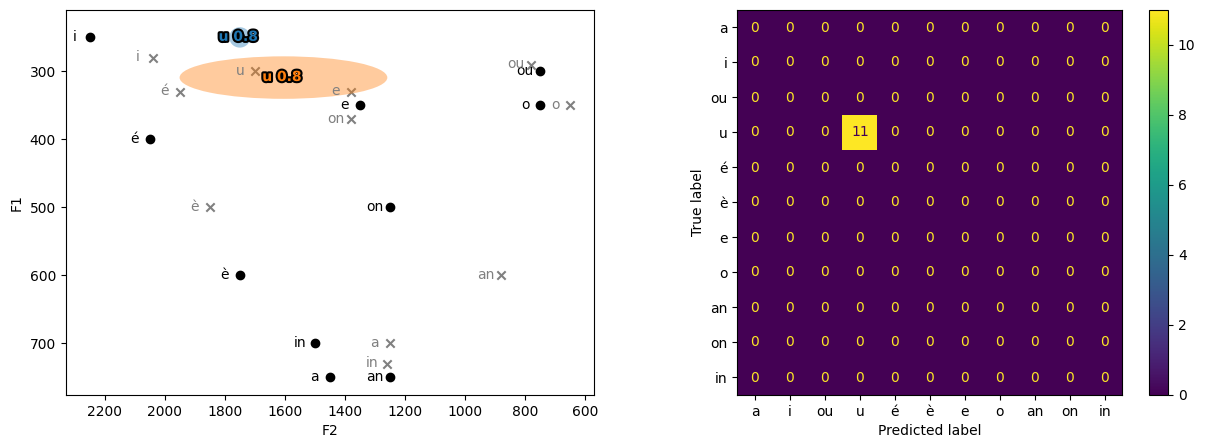

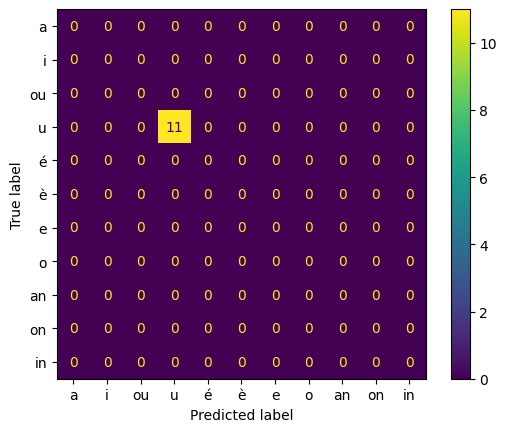

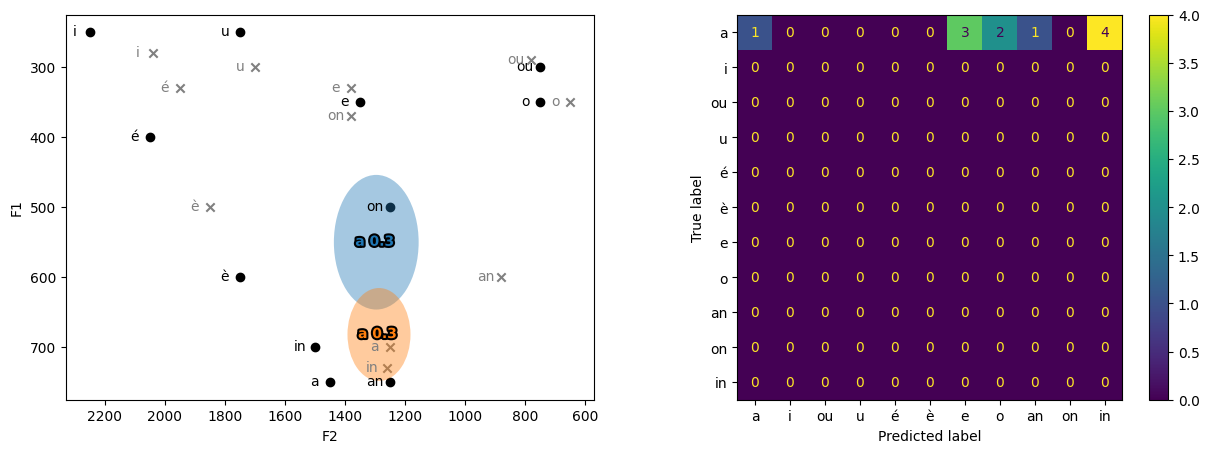

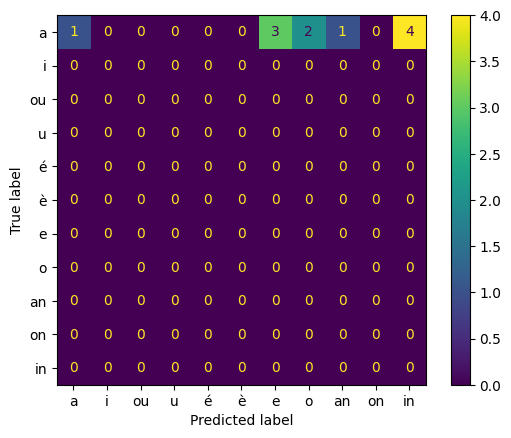

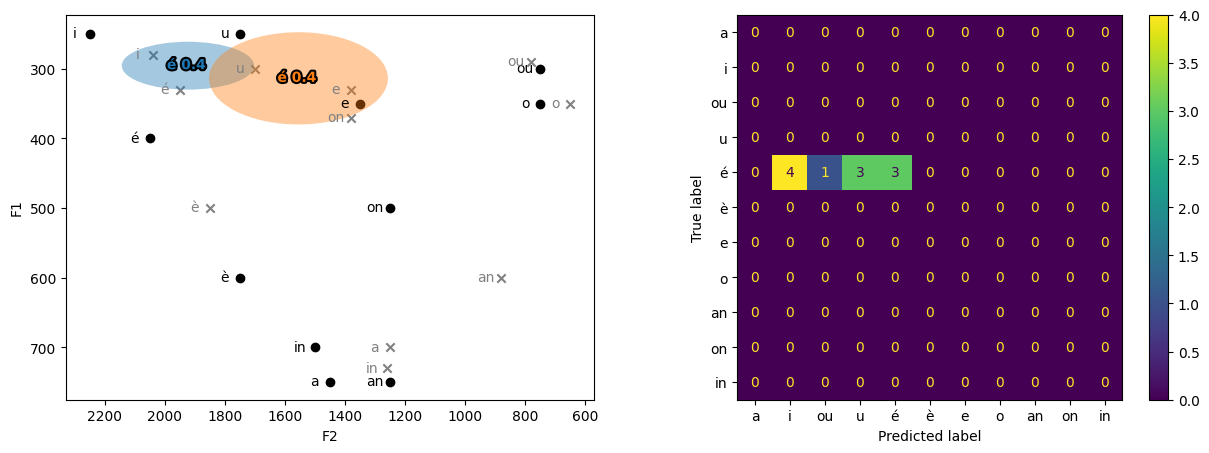

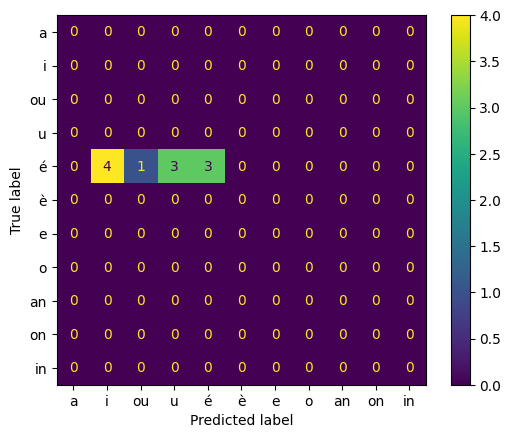

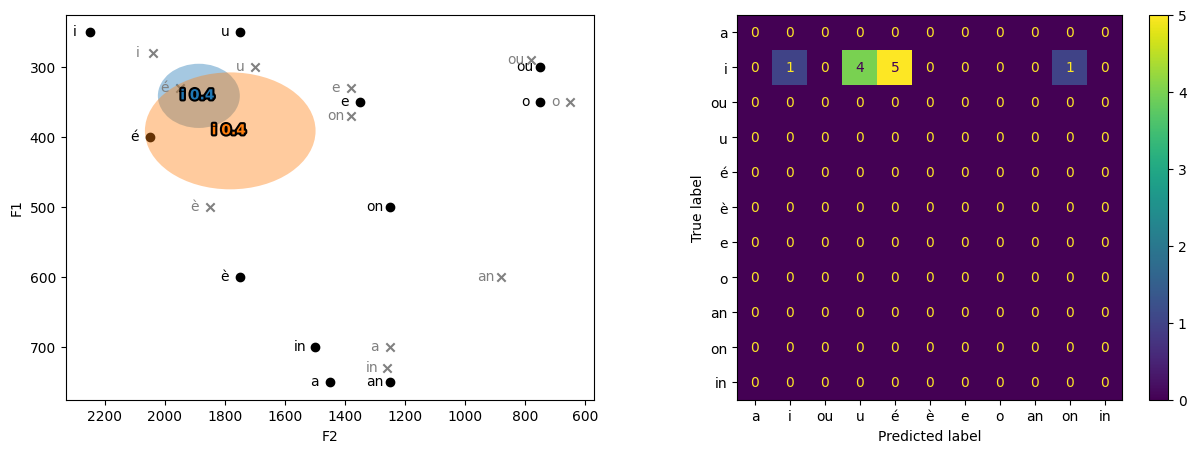

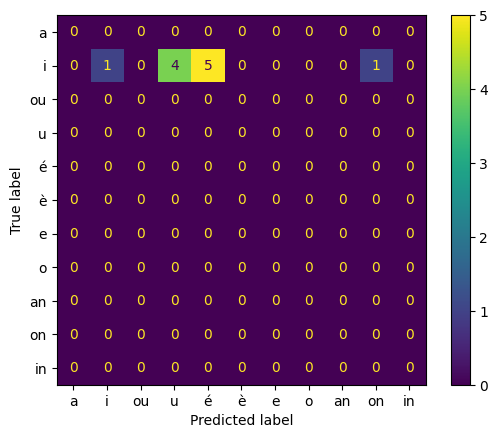

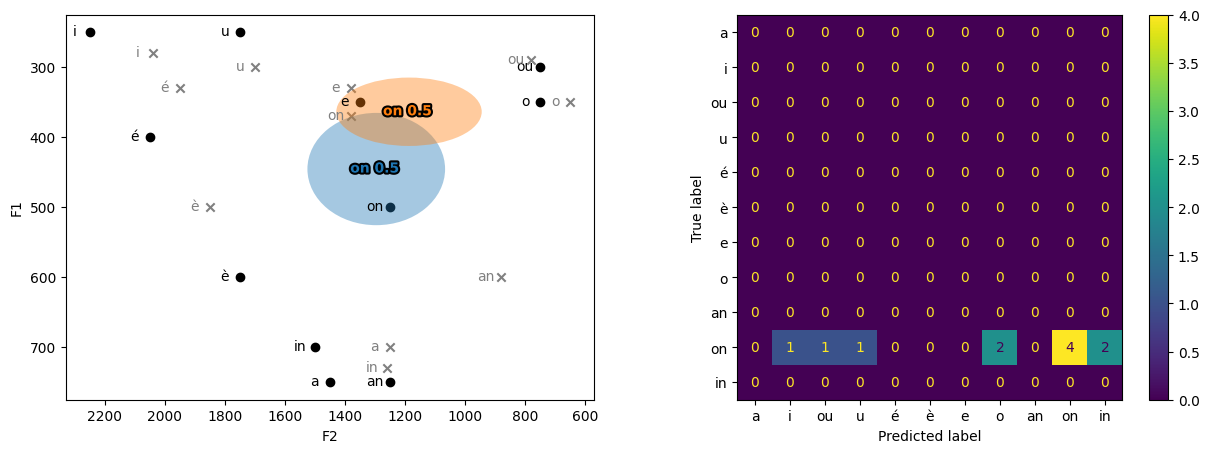

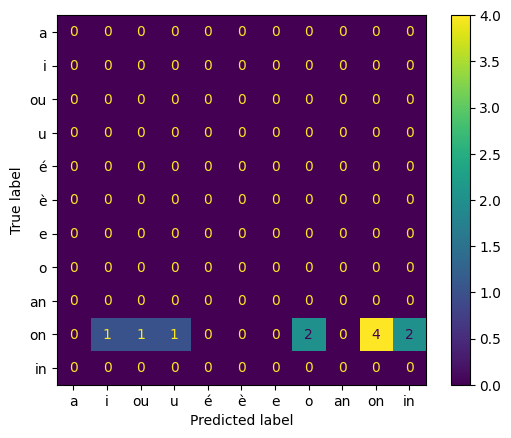

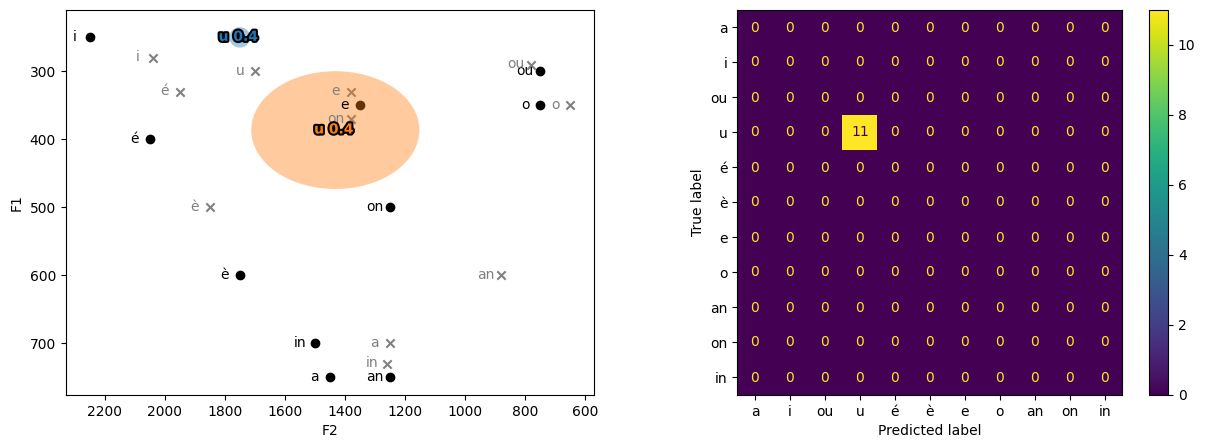

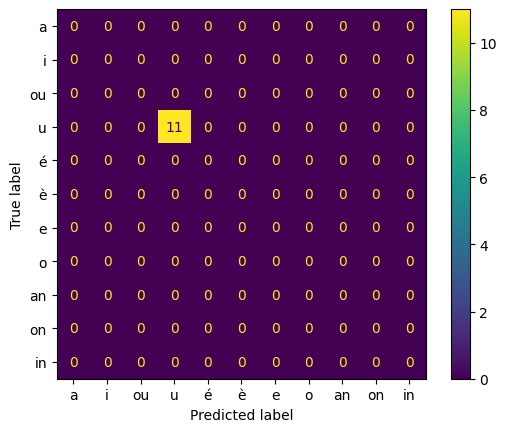

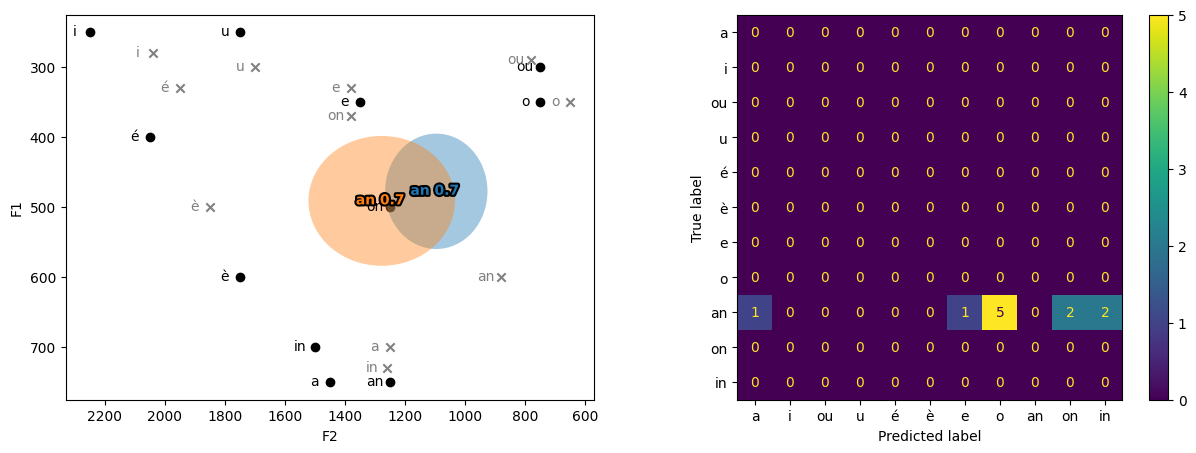

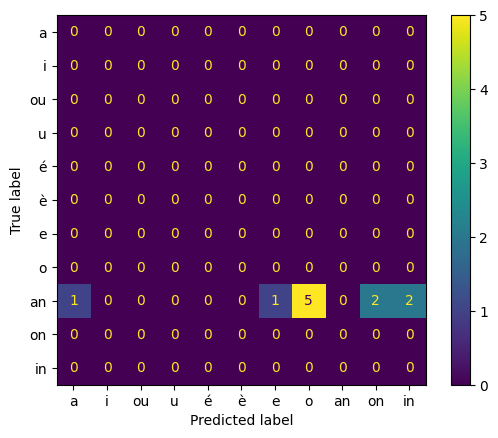

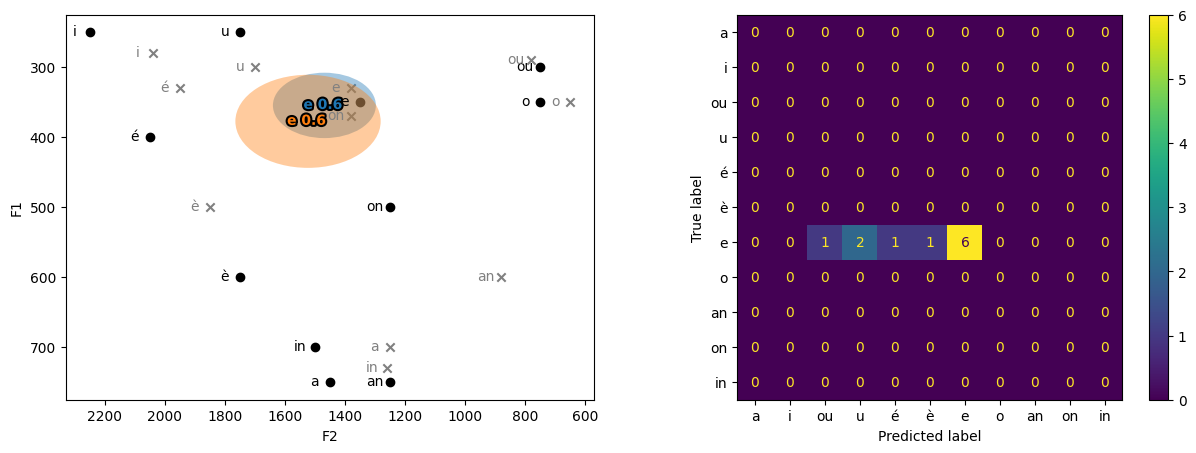

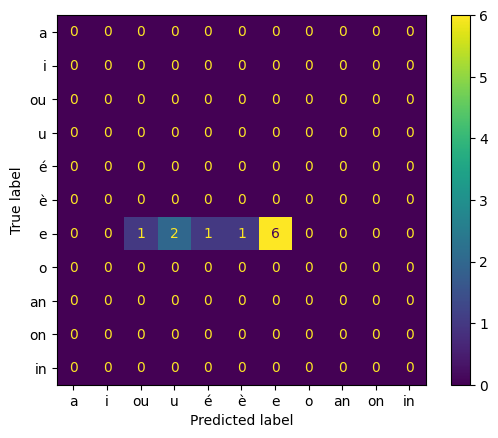

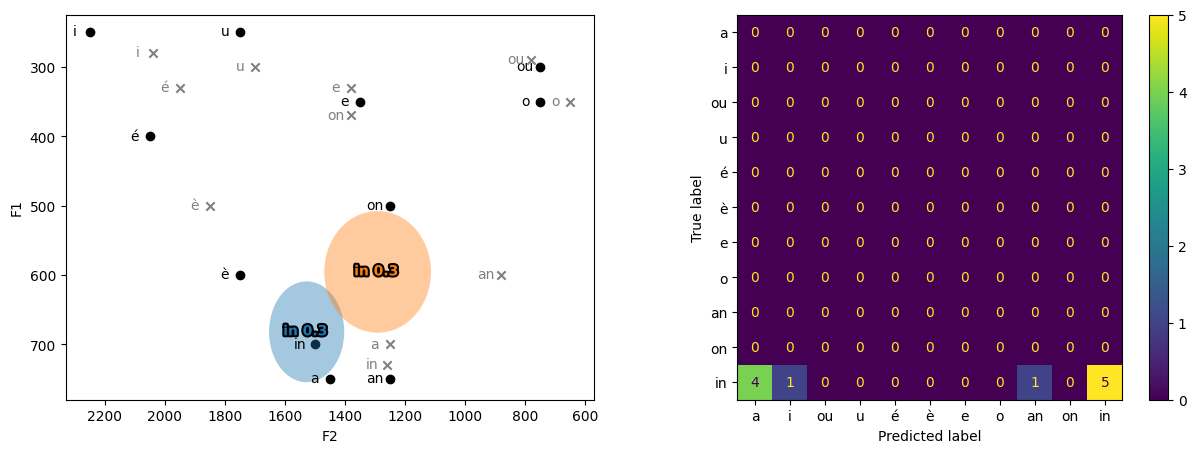

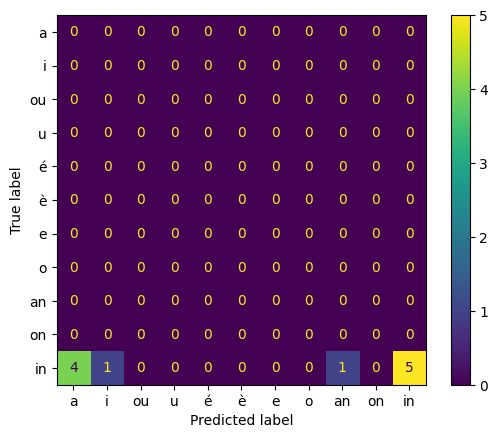

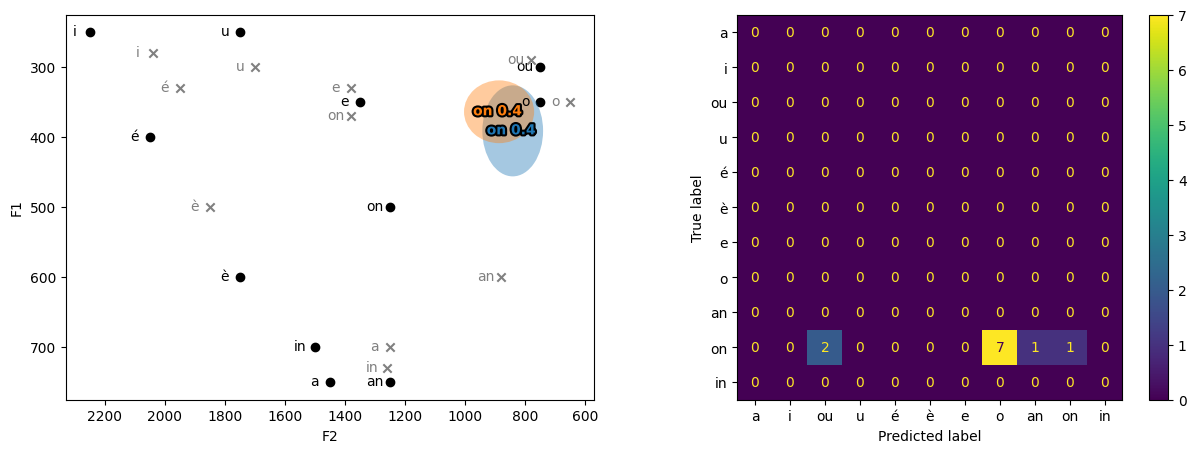

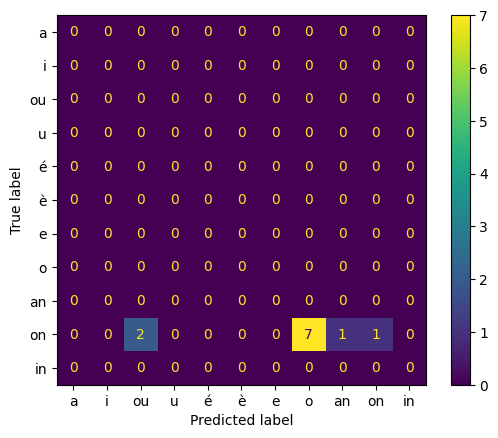

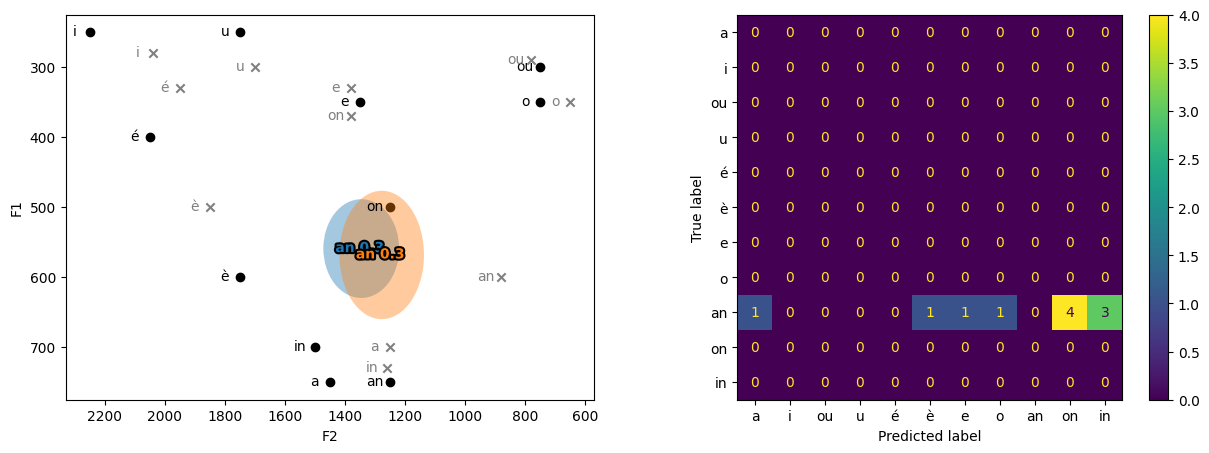

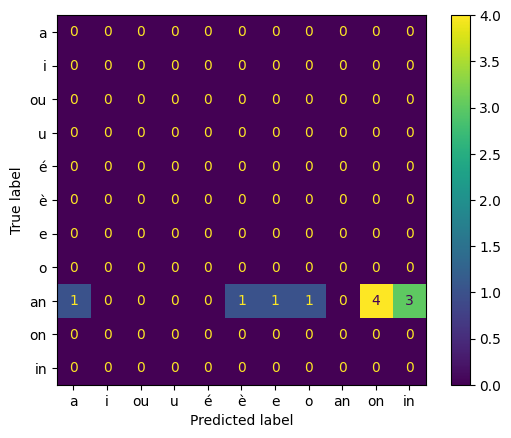

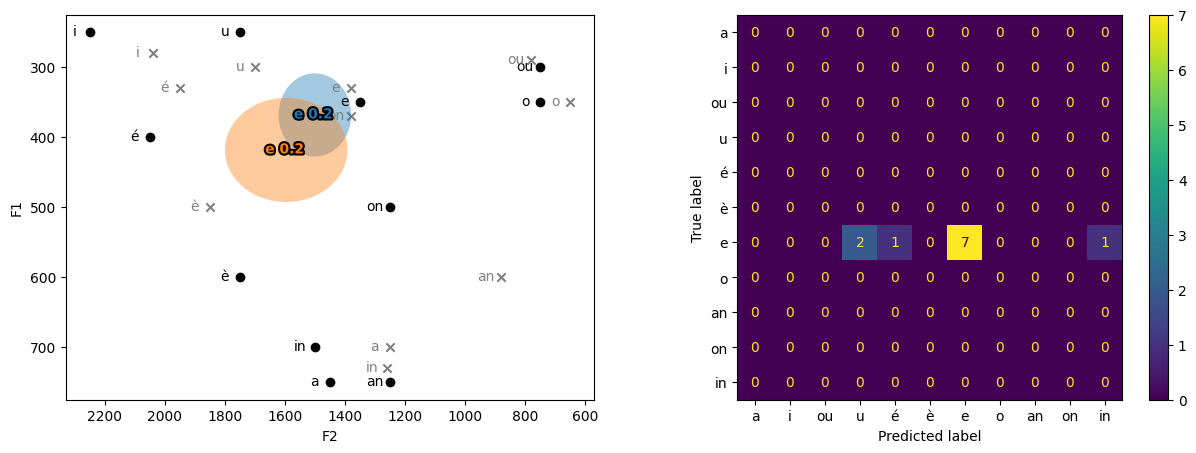

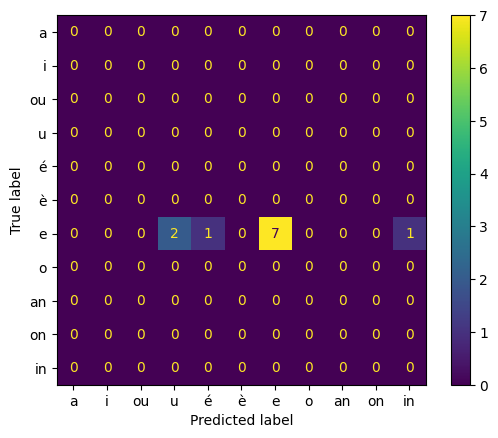

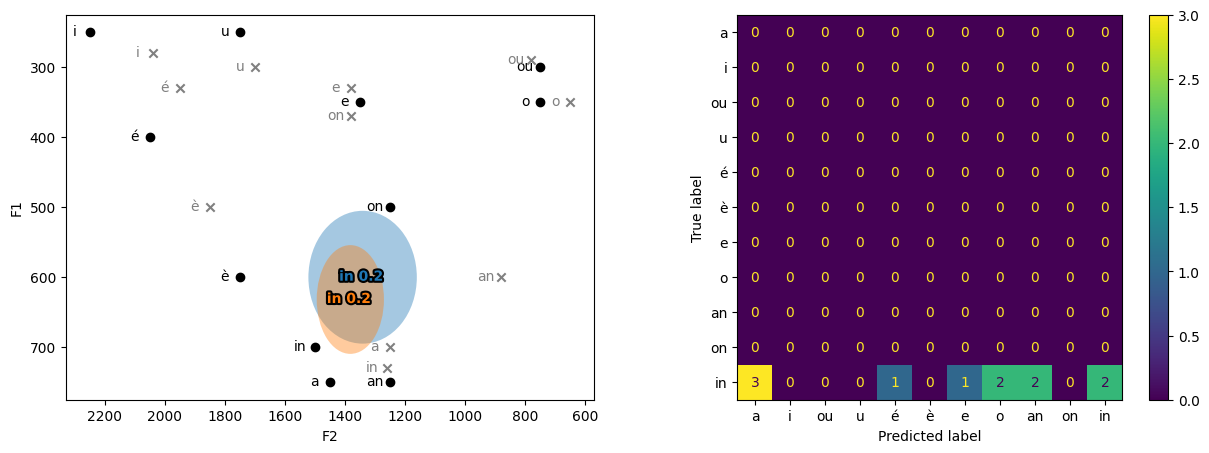

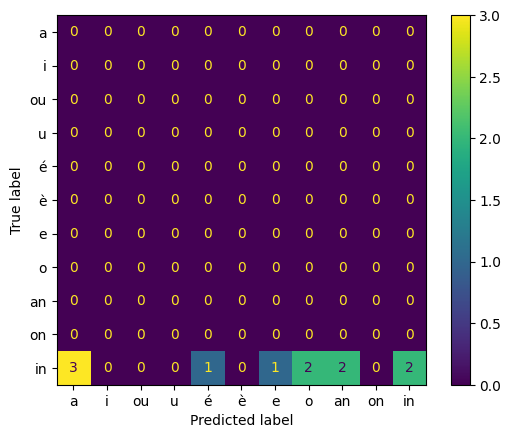

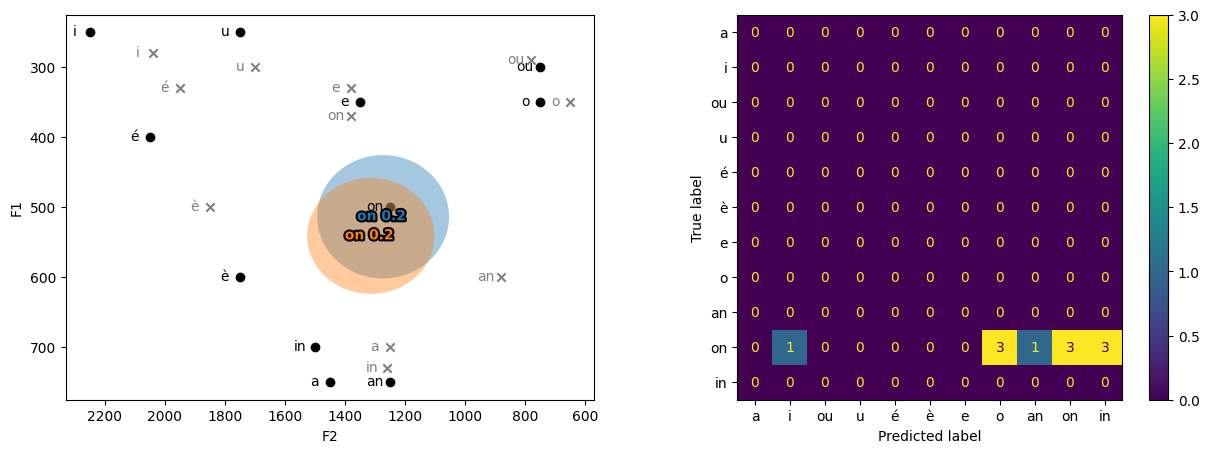

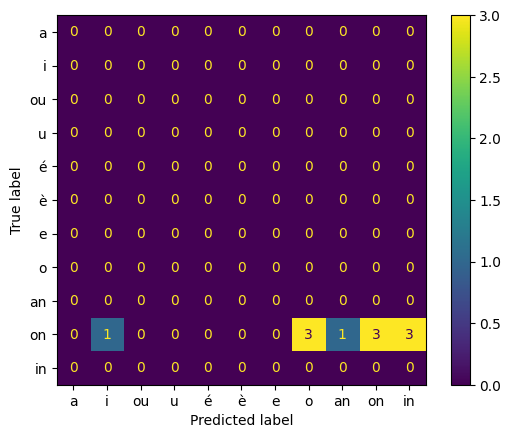

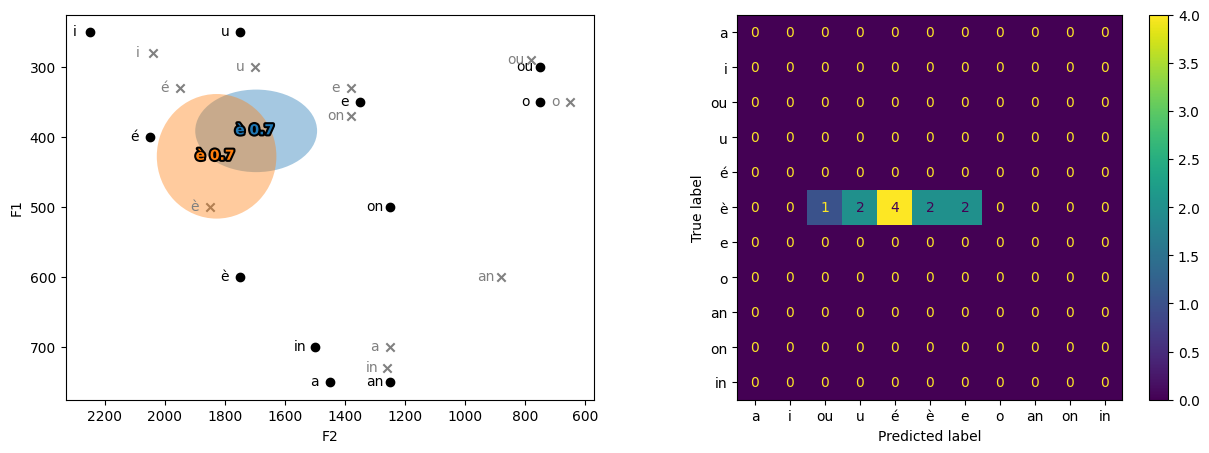

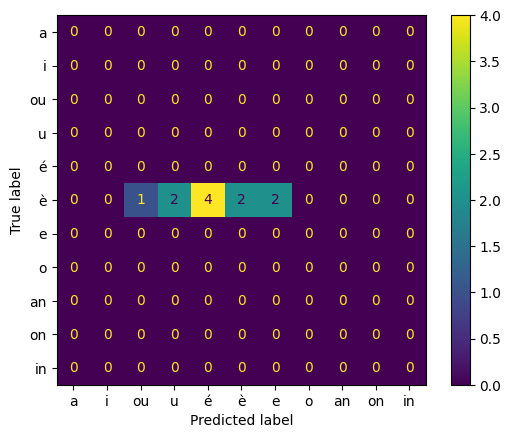

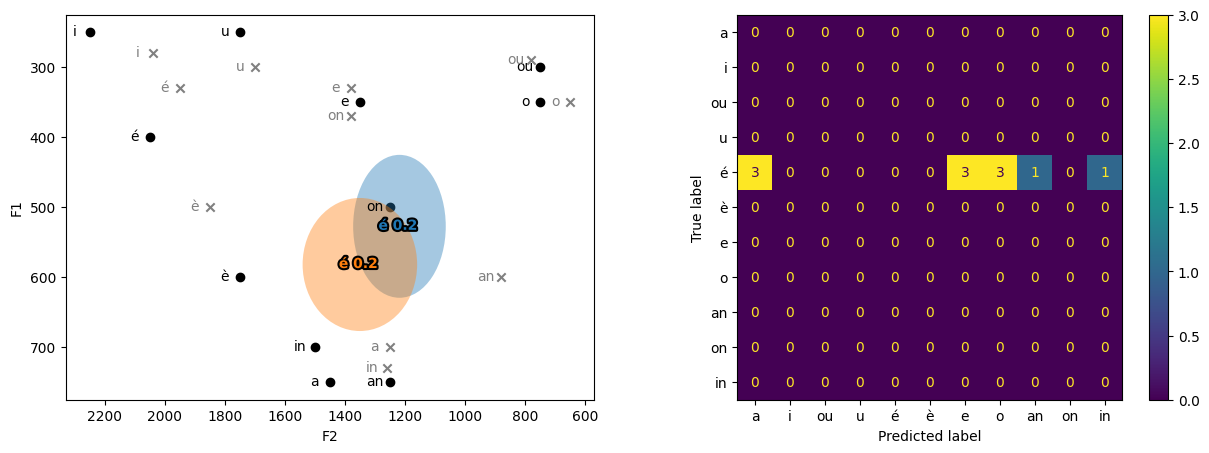

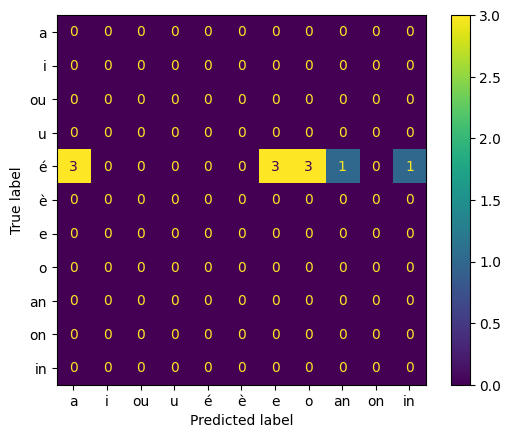

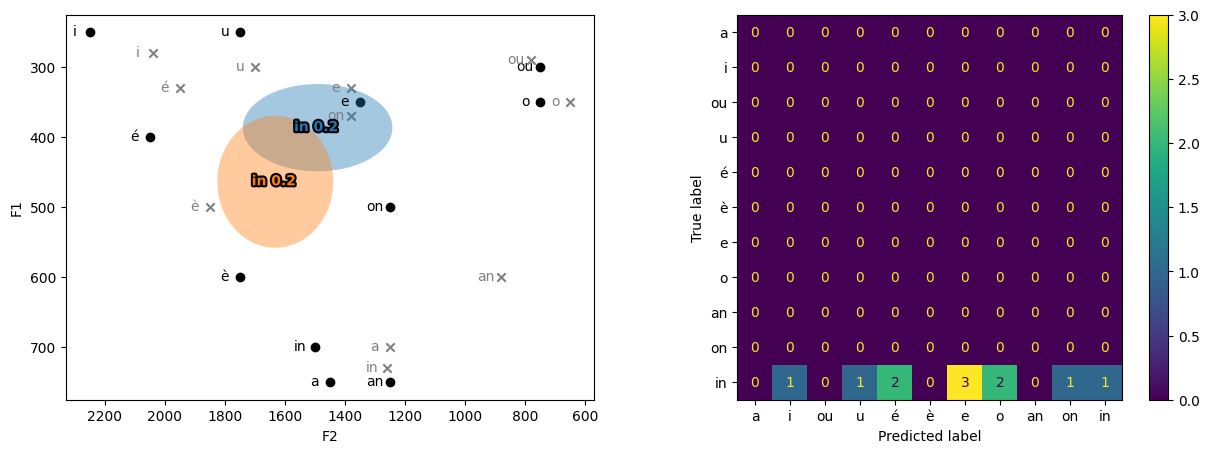

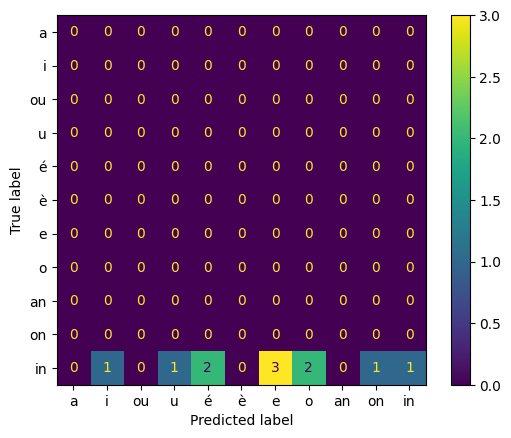

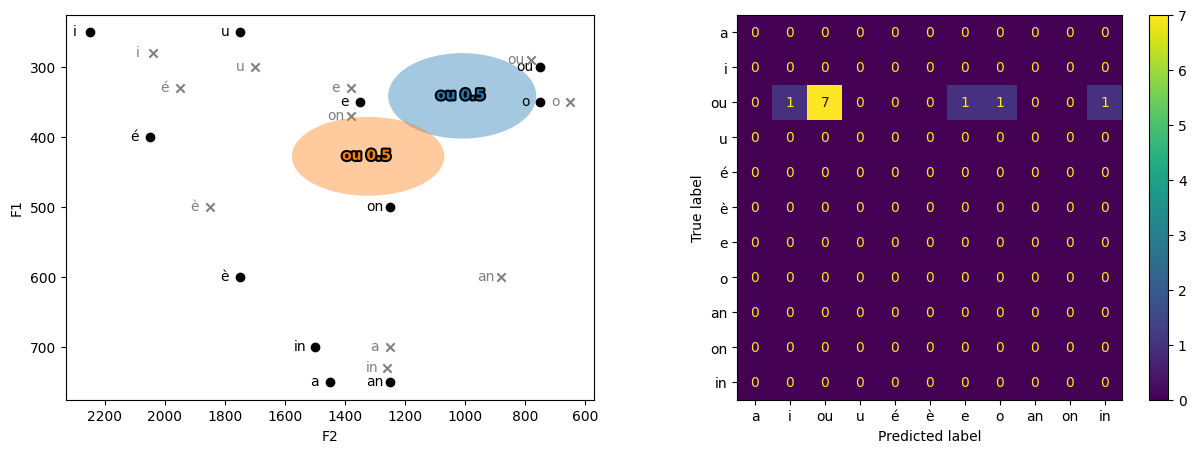

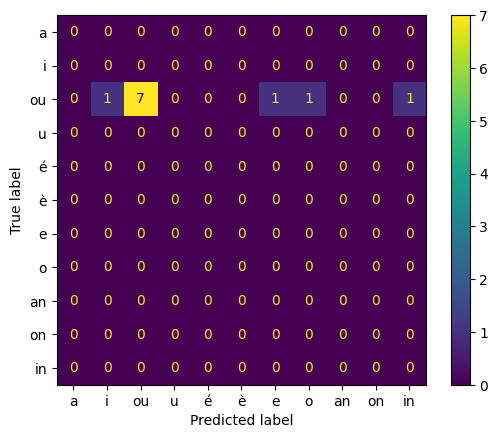

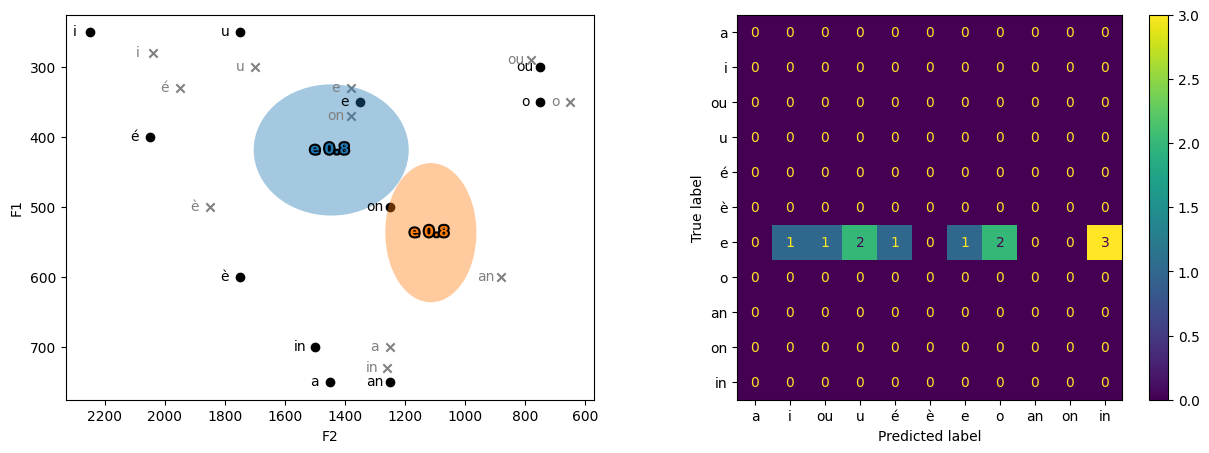

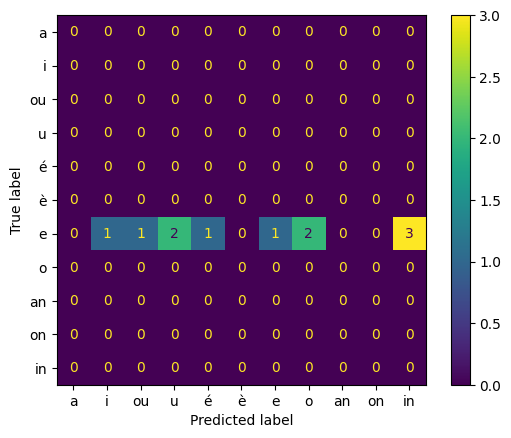

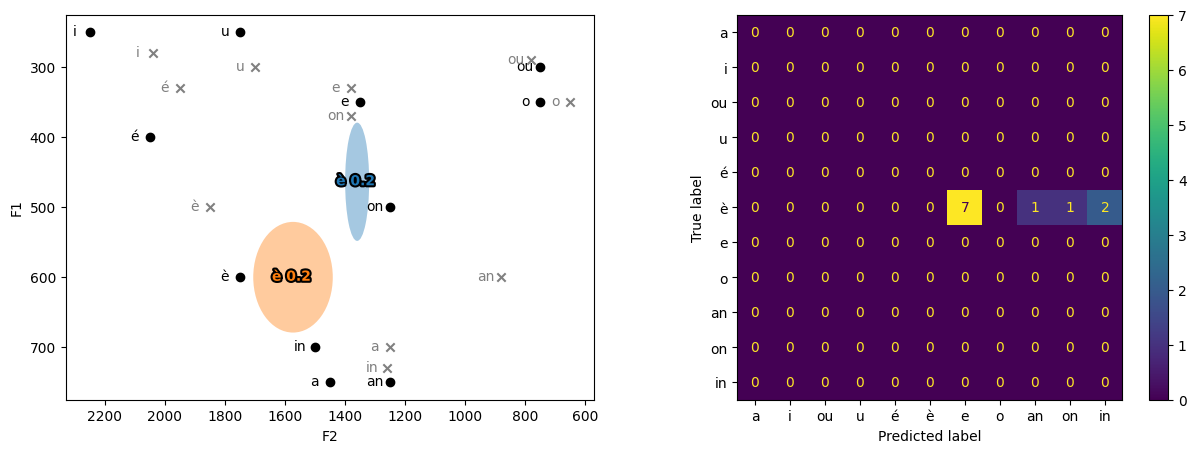

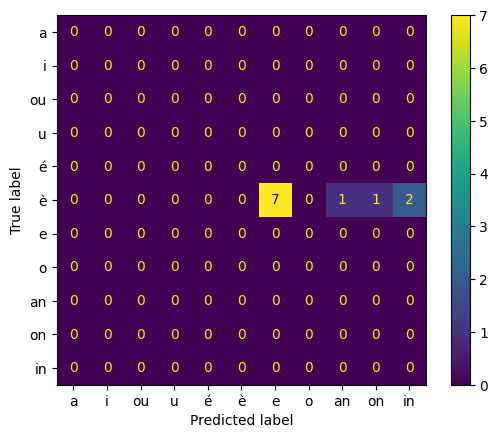

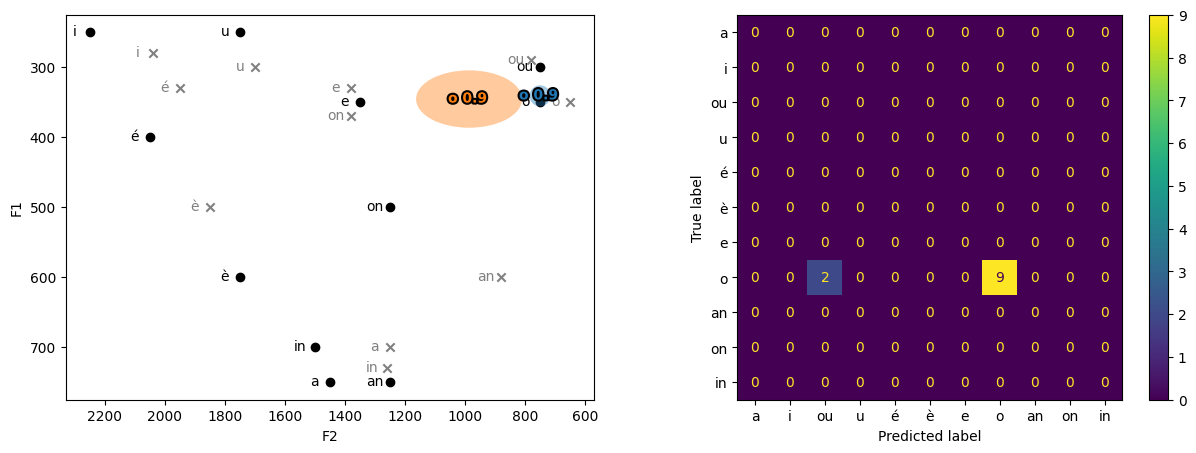

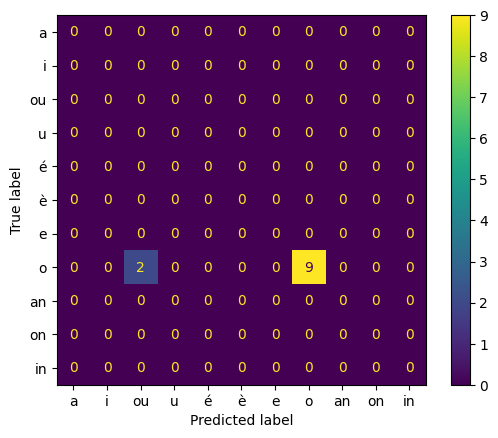

In [19]:
# Plot each trial independently

max_index = Trial.select(pw.fn.MAX(Trial.index)).scalar()

labels = [v for v in vowels]
for i in range(max_index):
    # fig, ax = plt.subplots()
    fig, axs = plt.subplots(1, 2, figsize=(15,5))

    selection = Trial.select().where(Trial.index==i)
    
    truth = [t.truth for t in selection]
    trial_predictions = [t.answer1 for t in selection]
    
    plot_trials(axs[0], selection, tags=['vowel', 'assist'], color_map=ALL_BLUE)
    plot_trials(axs[0], selection, vocalic_triangle=False, answer='answer2', tags=['vowel', 'assist'], color_map=ALL_ORANGE)

    ConfusionMatrixDisplay.from_predictions(truth, trial_predictions, labels=labels).plot(ax=axs[1])


In [37]:
def hz_to_mel(f):
    return 2595 * np.log(1+f/100)

def mel_to_hz(m):
    return 100 * (10 ** (m/2595) - 1) 

def distance(v1: Vowel, v2: Vowel) -> float:
    return (   (hz_to_mel(v1.F1) - hz_to_mel(v2.F1))**2 
             + (hz_to_mel(v1.F2) - hz_to_mel(v2.F2))**2
           )**(0.5)


Text(0, 0.5, 'Mel')

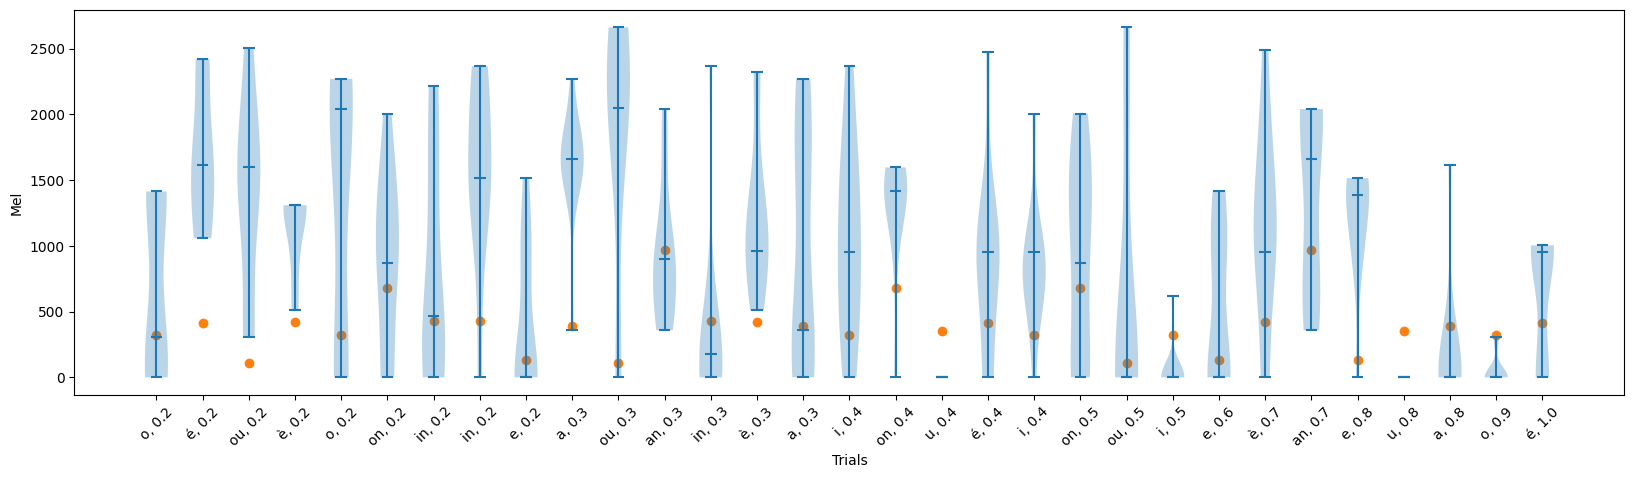

In [44]:
max_index = Trial.select(pw.fn.MAX(Trial.index)).scalar()

# /!\ assumes participant 1 is complete
indexes_sorted_by_assist = [t.index for t in Trial.select().order_by(Trial.assist).where(Trial.participant==1)]

fig, ax = plt.subplots(1, 1, figsize=(20,5))
# fig, axs = plt.subplots(1, 2, figsize=(15,5))


distances = []
distances_to_closest_or_second = []
distances_to_by = []
by_to_standard_distances = []
labels = []
for n, i in enumerate(indexes_sorted_by_assist):
    selection = Trial.select().where(Trial.index==i)

    truth = selection[0].truth
    assist = selection[0].assist
    
    trial_truth_vowel = vowels[truth]
    assist_vowel = by_vowels[truth]
    
    trial_predicted_vowels = [vowels[t.answer1] for t in selection]
    trial_predicted_closest_or_second_vowels = [vowels[t.truth] if t.truth in (t.answer1, t.answer2) else vowels[t.answer1] for t in selection]
    
    distances.append([distance(v, trial_truth_vowel) for v in trial_predicted_vowels])
    distances_to_closest_or_second.append([distance(v, trial_truth_vowel) for v in trial_predicted_closest_or_second_vowels])
    distances_to_by.append([distance(v, assist_vowel) for v in trial_predicted_vowels])
    by_to_standard_distances.append(distance(trial_truth_vowel, assist_vowel))
    
    ax.scatter(n, by_to_standard_distances[n], color='tab:orange')
    labels.append(f'{truth}, {assist}')

ax.violinplot(distances, positions=range(len(labels)), showmedians=True)

ax.set_xlabel('Trials')
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=45)
ax.set_ylabel('Mel')

[Text(0, 0, 'o, 0.2'),
 Text(1, 0, 'é, 0.2'),
 Text(2, 0, 'ou, 0.2'),
 Text(3, 0, 'è, 0.2'),
 Text(4, 0, 'o, 0.2'),
 Text(5, 0, 'on, 0.2'),
 Text(6, 0, 'in, 0.2'),
 Text(7, 0, 'in, 0.2'),
 Text(8, 0, 'e, 0.2'),
 Text(9, 0, 'a, 0.3'),
 Text(10, 0, 'ou, 0.3'),
 Text(11, 0, 'an, 0.3'),
 Text(12, 0, 'in, 0.3'),
 Text(13, 0, 'è, 0.3'),
 Text(14, 0, 'a, 0.3'),
 Text(15, 0, 'i, 0.4'),
 Text(16, 0, 'on, 0.4'),
 Text(17, 0, 'u, 0.4'),
 Text(18, 0, 'é, 0.4'),
 Text(19, 0, 'i, 0.4'),
 Text(20, 0, 'on, 0.5'),
 Text(21, 0, 'ou, 0.5'),
 Text(22, 0, 'i, 0.5'),
 Text(23, 0, 'e, 0.6'),
 Text(24, 0, 'è, 0.7'),
 Text(25, 0, 'an, 0.7'),
 Text(26, 0, 'e, 0.8'),
 Text(27, 0, 'u, 0.8'),
 Text(28, 0, 'a, 0.8'),
 Text(29, 0, 'o, 0.9'),
 Text(30, 0, 'é, 1.0')]

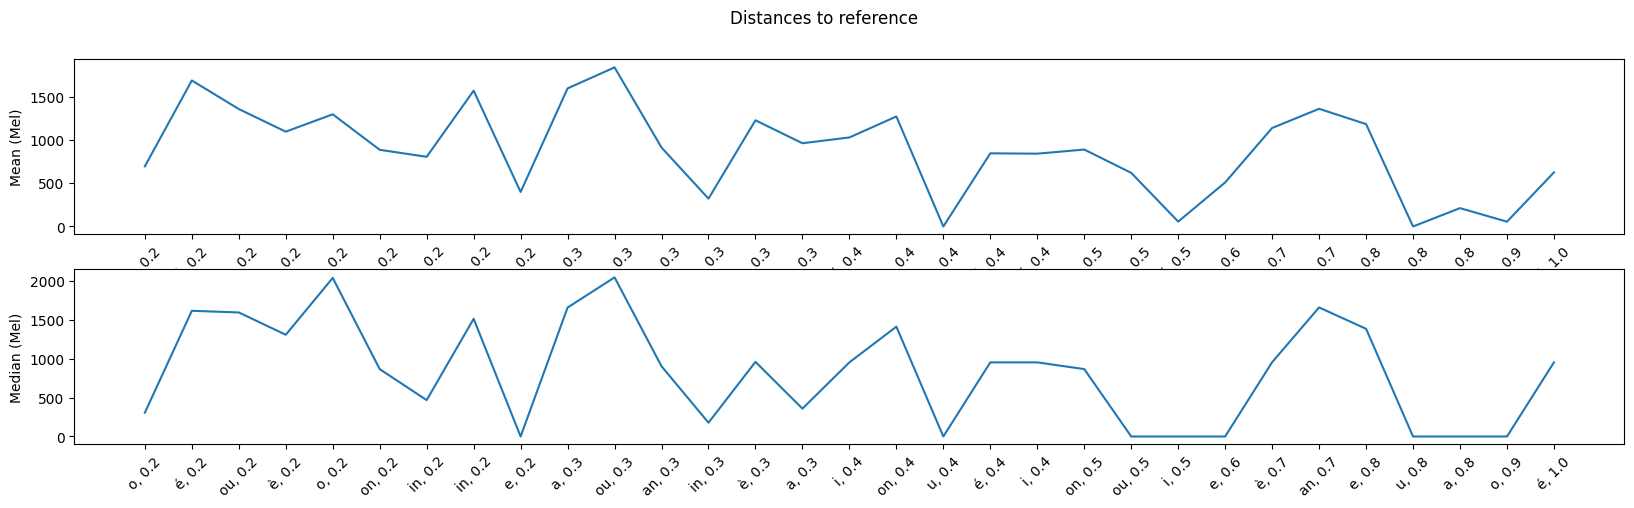

In [40]:
fig, axs = plt.subplots(2, 1, figsize=(20,5))

mean_distances = [np.mean(d) for d in distances]
median_distances = [np.median(d) for d in distances]

fig.suptitle('Distances to reference')
axs[0].plot(mean_distances)
axs[0].set_xlabel('Trials')
axs[0].set_ylabel('Mean (Mel)')
axs[0].set_xticks(range(len(labels)))
axs[0].set_xticklabels(labels, rotation=45)

axs[1].plot(median_distances)
axs[1].set_ylabel('Median (Mel)')
axs[1].set_xticks(range(len(labels)))
axs[1].set_xticklabels(labels, rotation=45)

[Text(0, 0, 'o, 0.2'),
 Text(1, 0, 'é, 0.2'),
 Text(2, 0, 'ou, 0.2'),
 Text(3, 0, 'è, 0.2'),
 Text(4, 0, 'o, 0.2'),
 Text(5, 0, 'on, 0.2'),
 Text(6, 0, 'in, 0.2'),
 Text(7, 0, 'in, 0.2'),
 Text(8, 0, 'e, 0.2'),
 Text(9, 0, 'a, 0.3'),
 Text(10, 0, 'ou, 0.3'),
 Text(11, 0, 'an, 0.3'),
 Text(12, 0, 'in, 0.3'),
 Text(13, 0, 'è, 0.3'),
 Text(14, 0, 'a, 0.3'),
 Text(15, 0, 'i, 0.4'),
 Text(16, 0, 'on, 0.4'),
 Text(17, 0, 'u, 0.4'),
 Text(18, 0, 'é, 0.4'),
 Text(19, 0, 'i, 0.4'),
 Text(20, 0, 'on, 0.5'),
 Text(21, 0, 'ou, 0.5'),
 Text(22, 0, 'i, 0.5'),
 Text(23, 0, 'e, 0.6'),
 Text(24, 0, 'è, 0.7'),
 Text(25, 0, 'an, 0.7'),
 Text(26, 0, 'e, 0.8'),
 Text(27, 0, 'u, 0.8'),
 Text(28, 0, 'a, 0.8'),
 Text(29, 0, 'o, 0.9'),
 Text(30, 0, 'é, 1.0')]

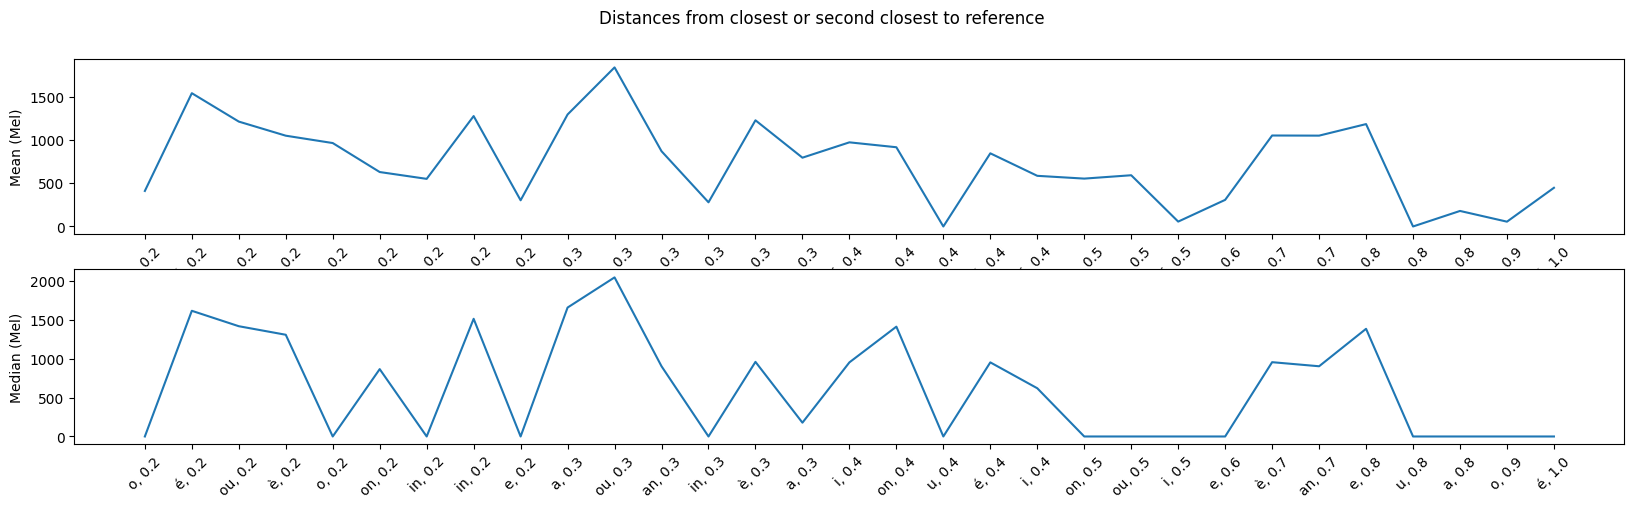

In [41]:
fig, axs = plt.subplots(2, 1, figsize=(20,5))

mean_distances = [np.mean(d) for d in distances_to_closest_or_second]
median_distances = [np.median(d) for d in distances_to_closest_or_second]

fig.suptitle('Distances from closest or second closest to reference ')
axs[0].plot(mean_distances)
axs[0].set_xlabel('Trials')
axs[0].set_ylabel('Mean (Mel)')
axs[0].set_xticks(range(len(labels)))
axs[0].set_xticklabels(labels, rotation=45)

axs[1].plot(median_distances)
axs[1].set_ylabel('Median (Mel)')
axs[1].set_xticks(range(len(labels)))
axs[1].set_xticklabels(labels, rotation=45)

[Text(0, 0, 'o, 0.2'),
 Text(1, 0, 'é, 0.2'),
 Text(2, 0, 'ou, 0.2'),
 Text(3, 0, 'è, 0.2'),
 Text(4, 0, 'o, 0.2'),
 Text(5, 0, 'on, 0.2'),
 Text(6, 0, 'in, 0.2'),
 Text(7, 0, 'in, 0.2'),
 Text(8, 0, 'e, 0.2'),
 Text(9, 0, 'a, 0.3'),
 Text(10, 0, 'ou, 0.3'),
 Text(11, 0, 'an, 0.3'),
 Text(12, 0, 'in, 0.3'),
 Text(13, 0, 'è, 0.3'),
 Text(14, 0, 'a, 0.3'),
 Text(15, 0, 'i, 0.4'),
 Text(16, 0, 'on, 0.4'),
 Text(17, 0, 'u, 0.4'),
 Text(18, 0, 'é, 0.4'),
 Text(19, 0, 'i, 0.4'),
 Text(20, 0, 'on, 0.5'),
 Text(21, 0, 'ou, 0.5'),
 Text(22, 0, 'i, 0.5'),
 Text(23, 0, 'e, 0.6'),
 Text(24, 0, 'è, 0.7'),
 Text(25, 0, 'an, 0.7'),
 Text(26, 0, 'e, 0.8'),
 Text(27, 0, 'u, 0.8'),
 Text(28, 0, 'a, 0.8'),
 Text(29, 0, 'o, 0.9'),
 Text(30, 0, 'é, 1.0')]

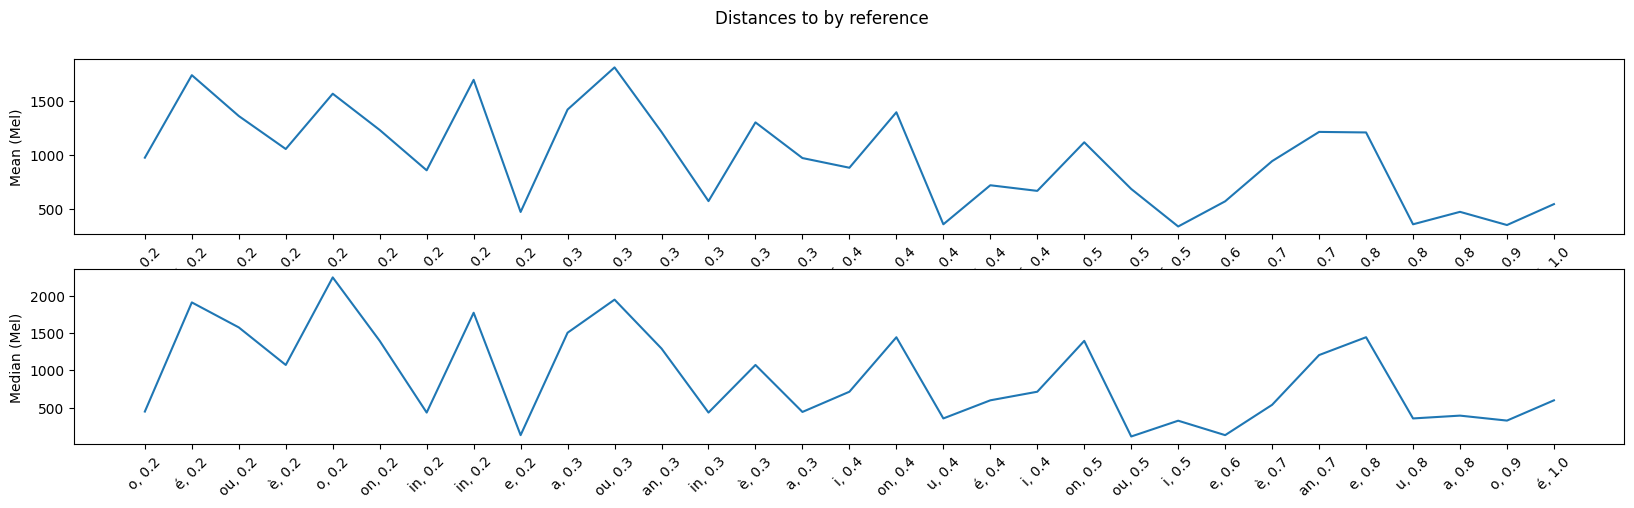

In [45]:
fig, axs = plt.subplots(2, 1, figsize=(20,5))

mean_distances = [np.mean(d) for d in distances_to_by]
median_distances = [np.median(d) for d in distances_to_by]

fig.suptitle('Distances to by reference ')
axs[0].plot(mean_distances)
axs[0].set_xlabel('Trials')
axs[0].set_ylabel('Mean (Mel)')
axs[0].set_xticks(range(len(labels)))
axs[0].set_xticklabels(labels, rotation=45)

axs[1].plot(median_distances)
axs[1].set_ylabel('Median (Mel)')
axs[1].set_xticks(range(len(labels)))
axs[1].set_xticklabels(labels, rotation=45)

[Text(0, 0, 'o, 0.2'),
 Text(1, 0, 'é, 0.2'),
 Text(2, 0, 'ou, 0.2'),
 Text(3, 0, 'è, 0.2'),
 Text(4, 0, 'o, 0.2'),
 Text(5, 0, 'on, 0.2'),
 Text(6, 0, 'in, 0.2'),
 Text(7, 0, 'in, 0.2'),
 Text(8, 0, 'e, 0.2'),
 Text(9, 0, 'a, 0.3'),
 Text(10, 0, 'ou, 0.3'),
 Text(11, 0, 'an, 0.3'),
 Text(12, 0, 'in, 0.3'),
 Text(13, 0, 'è, 0.3'),
 Text(14, 0, 'a, 0.3'),
 Text(15, 0, 'i, 0.4'),
 Text(16, 0, 'on, 0.4'),
 Text(17, 0, 'u, 0.4'),
 Text(18, 0, 'é, 0.4'),
 Text(19, 0, 'i, 0.4'),
 Text(20, 0, 'on, 0.5'),
 Text(21, 0, 'ou, 0.5'),
 Text(22, 0, 'i, 0.5'),
 Text(23, 0, 'e, 0.6'),
 Text(24, 0, 'è, 0.7'),
 Text(25, 0, 'an, 0.7'),
 Text(26, 0, 'e, 0.8'),
 Text(27, 0, 'u, 0.8'),
 Text(28, 0, 'a, 0.8'),
 Text(29, 0, 'o, 0.9'),
 Text(30, 0, 'é, 1.0')]

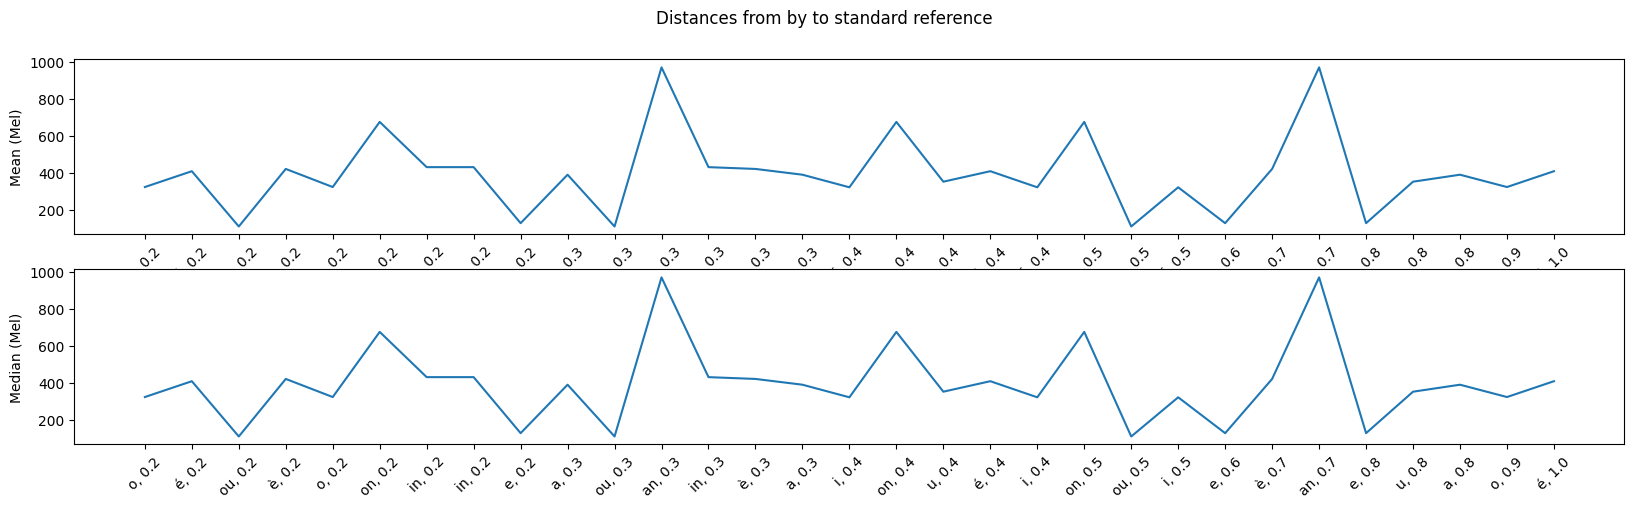

In [43]:
fig, axs = plt.subplots(2, 1, figsize=(20,5))

mean_distances = [np.mean(d) for d in by_to_standard_distances]
median_distances = [np.median(d) for d in by_to_standard_distances]


fig.suptitle('Distances from by to standard reference')
axs[0].plot(mean_distances)
axs[0].set_xlabel('Trials')
axs[0].set_ylabel('Mean (Mel)')
axs[0].set_xticks(range(len(labels)))
axs[0].set_xticklabels(labels, rotation=45)

axs[1].plot(median_distances)
axs[1].set_ylabel('Median (Mel)')
axs[1].set_xticks(range(len(labels)))
axs[1].set_xticklabels(labels, rotation=45)

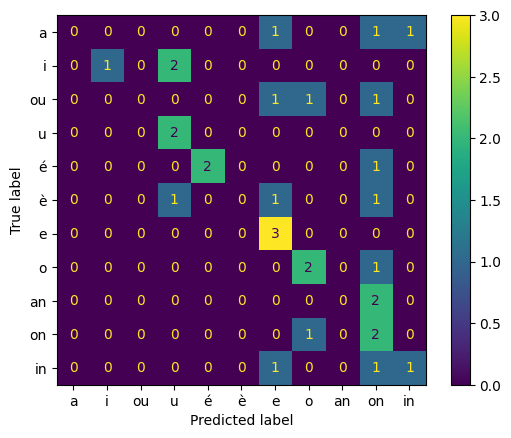

In [24]:
# get closest by vowel to average vowel prediction


def find_closest_vowel(vowel, reference='by'):
    vowel_list = [v for v in vowels]
    distances = [distance(vowels[ref], vowel) for ref in vowel_list]
    return vowel_list[np.argmin(distances)]


max_index = Trial.select(pw.fn.MAX(Trial.index)).scalar()

closest_vowel = []
for i in range(max_index+1):
    selection = Trial.select().where(Trial.index==i)
    (mean_f1, mean_f2), _ = trial_stats(selection[:])
    vowel = Vowel(mean_f1, mean_f2, False, 0, 0)
    closest_vowel.append(find_closest_vowel(vowel))


truth = [t.truth for t in Trial.select().where(Trial.participant==1).order_by(Trial.index)]
labels = [v for v in vowels]
disp = ConfusionMatrixDisplay.from_predictions(truth, closest_vowel, labels=labels)
